# Caso de negocio: Análisis del mercado financiero de EE.UU.
### Jorge Martínez López A01704518
La firma ha estado realizando análisis financieros y pronósticos financieros durante varios años. Te contrataron para idear mejores modelos analíticos financieros para diseñar carteras financieras.
<br><br>
Hay que analizar los estados financieros trimestrales históricos de las empresas públicas reales de EE.UU. que cotizan en la Bolsa de Nueva York y en el NASDAQ. Conjuntos de datos csv:

1. https://www.apradie.com/datos/dataus2024.csv
2. https://www.apradie.com/datos/firmsus2024.csv

El primer conjunto de datos (dataus2024q2) contiene los datos financieros históricos de las empresas, mientras que el segundo conjunto de datos (firmsus2024) es un catálogo de todas las empresas junto con el tipo de sector y el estado correspondiente (activo o cancelado).

El conjunto de datos dataus2024q2 tiene una estructura de datos de panel (también llamada formato largo). Cada fila tiene información financiera de una empresa de EE. UU. y 1 período (un trimestre).

### Objetivo
Plantear un modelo predictivo que pueda describir el comportamiento de los retornos compuesto en futuros años con respecto a ratios financieros, y mejorar el modelo predicitivo.

# Proyecto 1

In [729]:
#----LIBRERIAS----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import pearsonr
import scipy.stats as stats
from scipy.stats import mstats

In [730]:
#----CARGAR DATOS VALORES----
data = pd.read_csv('dataus2024.csv')
data.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,year,fixedassets,yearf,cto,fiscalq
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,62.879221,104.0000,452000.000,2000,NaN,NaN,1,NaN
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,2186000.0,0.0,44.589833,73.7500,452271.967,2000,1453000.0,2000.0,2,2.0
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,2510000.0,0.0,29.587999,48.9375,453014.579,2000,1581000.0,2000.0,3,3.0
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,2758000.0,0.0,33.102282,54.7500,456366.381,2000,1741000.0,2000.0,4,4.0
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,3070000.0,0.0,18.579600,30.7300,456769.737,2001,1821000.0,2001.0,1,1.0


In [731]:
#----CARGAR DATOS EMPRESA----
firm = pd.read_csv('firmsus2024.csv')
firm.head()

,empresa,Nombre,status,partind,naics1,naics2,SectorEconomatica
0,A,"Agilent Technologies, Inc",activo,0.09,Industrias manufactureras,"Fabricación de instrumentos de medición, contr...",Electroelectronic
1,AA,Alcoa Corp,activo,NaN,Industrias manufactureras,Industria básica del aluminio,Siderur & Metalur
2,AABA_old,Altaba Inc,cancelado,NaN,"Servicios profesionales, científicos y técnicos",Servicios de diseño de sistemas de cómputo y s...,Software y Datos
3,AAC_old,Aac Hldg Inc,cancelado,NaN,Servicios de salud y de asistencia social,Otros consultorios para el cuidado de la salud,Otros
4,AAIC_old,Arlington Asset Investment Corp,cancelado,NaN,Servicios financieros y de seguros,Otros fondos,Fondos


In [732]:
#----RENOMBRAR COLUMNAS----
firm_new = firm[["empresa", "Nombre", "status", "naics1"]]
firm_new.columns = ['firm', 'Empresa', 'status', 'industria' ]

#----COMBINACIÓN Y UNIÓN DE DATAFRAME----
data = pd.merge(data, firm_new, on='firm', how='left')
data = data.iloc[:-2] # Eliminamos los últimos dos renglones que representan los dos primeros trimestres del 2024
data

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,originalprice,sharesoutstanding,year,fixedassets,yearf,cto,fiscalq,Empresa,status,industria
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104.0000,452000.000,2000,NaN,NaN,1,NaN,"Agilent Technologies, Inc",activo,Industrias manufactureras
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,73.7500,452271.967,2000,1453000.0,2000.0,2,2.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,48.9375,453014.579,2000,1581000.0,2000.0,3,3.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,54.7500,456366.381,2000,1741000.0,2000.0,4,4.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,30.7300,456769.737,2001,1821000.0,2001.0,1,1.0,"Agilent Technologies, Inc",activo,Industrias manufactureras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557174,ZY_old,2022q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4300,104098.538,2022,NaN,NaN,4,NaN,Zymergen Inc,cancelado,"Servicios profesionales, científicos y técnicos"
557175,ZY_old,2023q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,104098.538,2023,NaN,NaN,1,NaN,Zymergen Inc,cancelado,"Servicios profesionales, científicos y técnicos"
557176,ZY_old,2023q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,104098.538,2023,NaN,NaN,2,NaN,Zymergen Inc,cancelado,"Servicios profesionales, científicos y técnicos"
557177,ZY_old,2023q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,104098.538,2023,NaN,NaN,3,NaN,Zymergen Inc,cancelado,"Servicios profesionales, científicos y técnicos"


<hr>

## CÁLCULO RATIO DE CONTROL Earnigs per share delated by price (EPSP)


1. COGS → Cost of Good Sold: Son los gastos  variables, cambian con las ventas

2. EBIT → Earnings before Interest and Taxes: Utlidad operativa antes de impuesto  

3. SGAE → Gastos administrativos fijos

4. FineXP → Pago de de intereses de prestamo

5. IncomeTax → Pago de impuesto sobre la renta

6. OtherIncome → Otras ventas no del core

7. Extraordinary Items → Ventas extraordinarias

8. EBT → Utilidad antes de impuesto

$$Gross Profit(Utilidad Bruta) = Revenue - COGS $$

 $$EBIT = Gross Profit - SGAE $$

 $$NetIncome = EBIT - FineXP - Income Tax + Other Income + Extraordinary Items $$

 $$EPS →  Earnigs per share = earnings / shareoutstanding $$

 $$EPSP → Earnigs per share delated by price= EPS / original price $$


In [733]:
data['GROSSPROFIT'] = data['revenue'] - data['cogs']
data['EBIT'] = data['GROSSPROFIT'] - data['sgae']
data['NETINCOME'] = data['GROSSPROFIT'] - data['finexp'] - data['incometax'] + data['otherincome'] + data['extraordinaryitems']
data['EBT'] = data['EBIT'] - data['finexp'] + data['otherincome'] + data['extraordinaryitems']

data['sharesoutstanding'] = data['sharesoutstanding'].where(data['sharesoutstanding'] != 0, np.nan)
data['EPS'] = data['NETINCOME'] / data['sharesoutstanding']

data['originalprice'] = data['originalprice'].where(data['originalprice'] != 0, np.nan)
data['EPSP'] = data['EPS'] / data['originalprice']

In [734]:
promedio_ponderado_EPSP = np.average(data['EPSP'].values, weights=data['originalprice'].values)
promedio_ponderado_EPSP = (data['EPSP'] * data['originalprice']).sum() / data['originalprice'].sum()

## CÁLCULO RATIO DE CONTROL  Book/Market 
Una variable de control son aquellas variables independientes que en el estudio tienen una relación alta con la variable independiente. Al incluir estas variables de control, los resultados del modelo serán mas robusto.

1. Valor de mercado → Market Value 
$$ Market Value = originalprice * shareoutstanding $$
2. originlprice → precio total de la acción

3. shareoutstanding → Número de acciones disponibles

4. Valor en libros → Book Value 
 $$ Book Value = totalassets - totalliabilities $$

5. totalassets → total de activos

6. totalliabilities → total de pasivos

$$ Book Marke = Book Value / Market Value


> **Advertencia**: VAMOS UTILIZAR EL METODO WHERE PARA CUANDO EL VALOR DE LA VARIABLE(MARKETVALUE) SEA CERO LOS CAMBIEMOS A NAN, YA QUE ES EL DENOMINADOR DEL CALCULO DEL NOOKMARKET, ASI NOS EVITAMOS ERRORES EN LOS CÁLCULOS. 

In [735]:
data['BOOKVALUE'] = data['totalassets'] - data['totalliabilities']
data['MARKETVALUE'] = data['originalprice'] * data['sharesoutstanding']
data['MARKETVALUE'] = data['MARKETVALUE'].where(data['MARKETVALUE'] != 0, np.nan)
data['BOOKMARKET'] = data['BOOKVALUE'] / data['MARKETVALUE']


In [736]:

promedio_ponderado_BM = (data['BOOKMARKET'] * data['MARKETVALUE']).sum() / data['MARKETVALUE'].sum()

<hr>

## CÁLCULO DEL RETORNO DE ACCIÓN COMPUESTO

Índice para agrupar y calcular los retornos 

In [737]:
data['qdate'] = pd.PeriodIndex(data.q, freq='Q')
data.set_index(['firm', 'qdate'], inplace=True)

#### Trimestral 

In [738]:
data['cc_return_q'] = np.log(data['adjprice']) - np.log(data.groupby('firm')['adjprice'].shift(1))


#### Anual 

In [739]:
data['cc_return_y'] = np.log(data['adjprice']) - np.log(data.groupby('firm')['adjprice'].shift(4))


## Calcular los Retornos Compuestos Futuro

#### Trimestral 

In [740]:
data['cc_return_q_f'] = data.groupby('firm')['cc_return_q'].shift(-1)



mejorar las interpretaciones para cc_return_q

#### Anual 

In [741]:
data['cc_return_y_f'] = data.groupby('firm')['cc_return_y'].shift(-4)


<hr>

## CÁLCULO DE 4 RATIOS 
<b>Gross Margin (Margen Bruto)</b>
<br><br>
El margen bruto mide la eficiencia de una empresa en la producción y venta de sus productos. 

* GrossMargin = GROSSPROFIT / renenue

<br><br>
Interpretación →  Un margen bruto más alto indica que la empresa retiene más dinero de cada dólar de ventas después de cubrir los costos directos de producción.
<br><br><br>
<b>Net Profit Margin (Margen de Beneficio Neto)</b>
Este ratiio mide la cantidad de ingresos que queda como beneficios neto ddespués de que se han deducido todos los gastos, incluidos los costos operativos, intereses e impuesto.
<br><br>

* NetProfitMargin = NETINCOME/revenue

<br><br>
Interpretacion → Un margen de beneficio neto alto indica que la empresa es capaz de convertir una gran parte de sus ingresos en ganancias. Un margen bajo puede señal de que la empresa en ganancias enfreta altos costos o gatos no operativos.
<br><br><br>
<b>Return on Equity(ROE) (Retorno sobre el Patrimonio)</b>
<br><br>
El ROE mide la rentabilidad de una empresa en relacion con el capital invertido por sus acciones. Utiliza el capital de los accionistas para generar ganancias. 
<br><br>

* ROE = NETINCOME/BOOKVALUE

<br><br>
Interpretacion → Un ROE alto sugiere que la empresa esta utilizando eficientemente el capital de los accionistas para generar beneficios. Utiliza el capital de los accionistas para generar ganancias. 
<br><br><br>
<b>Price to Earning Ratio(P/E)(Relacion Precio-Ganancias)</b>
<br><br>
Este ratio compara el precio de las acciones de una empresa con sus ganacias por accion (EPS). Se utiliza para evaluar si una accion esta sobrevalorada o subvalorada.
<br><br>

* P/E = MARKETVALUE/NETINCOME

<br><br>
Un P/E alto puede indicar que los inversores esperan un alto crecimiento en el futuro, mientra un P/E bajo sugiere que la accion esta infravalorada. P/E se debe de comparar con otra empresa. 


> **Advertencia**: VAMOS UTILIZAR EL METODO WHERE PARA CUANDO EL VALOR DE LAS VARIABLES(REVENUE, BOOKVALUE, NETINCOME) SEAN CERO LOS CAMBIEMOS A NAN, YA QUE ESTAS SON DENOMINADOR DEL CALCULO DE GROSS MARGIN, NET PROFIT MARGIN, RETURN ON EQUITY Y PRICE TO EARNING, ASI EVITAMOS ERRORES EN LOS CÁLCULOS 

### Gross Margin (Margen Bruto)

In [742]:
# Calcular Gross Margin
data['revenue'] = data['revenue'].where(data['revenue'] != 0, np.nan)
data['Gross Margin'] = data['GROSSPROFIT'] / data['revenue']

### Net Profit Margin (Margen de Beneficio Neto)

In [743]:
# Calcular Net Profit Margin
data['revenue'] = data['revenue'].where(data['revenue'] != 0, np.nan)
data['Net Profit Margin'] = data['NETINCOME'] / data['revenue']

### Return on Equity (ROE) (Retorno sobre el Patrimonio)

In [744]:
# Calcular ROE
data['BOOKVALUE'] = data['BOOKVALUE'].where(data['BOOKVALUE'] != 0, np.nan)
data['ROE'] = data['NETINCOME'] / data['BOOKVALUE']

### Price to Earnings (P/E)

In [745]:
# Calcular P/E
data['NETINCOME'] = data['NETINCOME'].where(data['NETINCOME'] != 0, np.nan)
data['P/E'] = data['MARKETVALUE'] / data['NETINCOME']

<hr>

## EVALUANDO LA INDUSTRIA 
Evaluaremos la industria del comercio al por mayor y menor. 

In [746]:
data_commercial = data[(data['industria'] == 'Comercio al por mayor') | (data['industria'] == 'Comercio al por menor')]
data_commercial= data_commercial.iloc[:-2]
data_commercial

q  fiscalmonth  revenue  cogs  sgae  otherincome  \
firm   qdate                                                           
AAP    2000Q1  2000q1          NaN      NaN   NaN   NaN          NaN   
       2000Q2  2000q2          NaN      NaN   NaN   NaN          NaN   
       2000Q3  2000q3          NaN      NaN   NaN   NaN          NaN   
       2000Q4  2000q4          NaN      NaN   NaN   NaN          NaN   
       2001Q1  2001q1          NaN      NaN   NaN   NaN          NaN   
...               ...          ...      ...   ...   ...          ...   
ZU_old 2022Q4  2022q4          NaN      NaN   NaN   NaN          NaN   
       2023Q1  2023q1          NaN      NaN   NaN   NaN          NaN   
       2023Q2  2023q2          NaN      NaN   NaN   NaN          NaN   
       2023Q3  2023q3          NaN      NaN   NaN   NaN          NaN   
       2023Q4  2023q4          NaN      NaN   NaN   NaN          NaN   

               extraordinaryitems  finexp  incometax  totalassets  ...  \
firm   qdate                                                       ...   
AAP    2000Q1                 NaN     NaN        NaN          NaN  ...   
       2000Q2                 NaN     NaN        NaN          NaN  ...   
       2000Q3                 NaN     NaN        NaN          NaN  ...   
       2000Q4                 NaN     NaN        NaN          NaN  ...   
       2001Q1                 NaN     NaN        NaN          NaN  ...   
...                           ...     ...        ...          ...  ...   
ZU_old 2022Q4                 NaN     NaN        NaN          NaN  ...   
       2023Q1                 NaN     NaN        NaN          NaN  ...   
       2023Q2                 NaN     NaN        NaN          NaN  ...   
       2023Q3                 NaN     NaN        NaN          NaN  ...   
       2023Q4                 NaN     NaN        NaN          NaN  ...   

               MARKETVALUE  BOOKMARKET  cc_return_q  cc_return_y  \
firm   qdate                                                       
AAP    2000Q1          NaN         NaN          NaN          NaN   
       2000Q2          NaN         NaN          NaN          NaN   
       2000Q3          NaN         NaN          NaN          NaN   
       2000Q4          NaN         NaN          NaN          NaN   
       2001Q1          NaN         NaN          NaN          NaN   
...                    ...         ...          ...          ...   
ZU_old 2022Q4          NaN         NaN          NaN          NaN   
       2023Q1          NaN         NaN          NaN          NaN   
       2023Q2          NaN         NaN          NaN          NaN   
       2023Q3          NaN         NaN          NaN          NaN   
       2023Q4          NaN         NaN          NaN          NaN   

               cc_return_q_f  cc_return_y_f  Gross Margin  Net Profit Margin  \
firm   qdate                                                                   
AAP    2000Q1            NaN            NaN           NaN                NaN   
       2000Q2            NaN            NaN           NaN                NaN   
       2000Q3            NaN            NaN           NaN                NaN   
       2000Q4            NaN            NaN           NaN                NaN   
       2001Q1            NaN            NaN           NaN                NaN   
...                      ...            ...           ...                ...   
ZU_old 2022Q4            NaN            NaN           NaN                NaN   
       2023Q1            NaN            NaN           NaN                NaN   
       2023Q2            NaN            NaN           NaN                NaN   
       2023Q3            NaN            NaN           NaN                NaN   
       2023Q4            NaN            NaN           NaN                NaN   

               ROE  P/E  
firm   qdate             
AAP    2000Q1  NaN  NaN  
       2000Q2  NaN  NaN  
       2000Q3  NaN  NaN  
       2000Q4  NaN  NaN  
       2001Q1  NaN  NaN  
...         

Seccionamos nuestra dataset con todas aquellas empresas que pertenezcan al sector de ventas minoristas y mayoristas.

> **Advertencia**: VAMOS ELIMINAR TODAS AQUELLAS EMPRESAS QUE DEL 2000 AL 2023 NO HAYAN TENIDO PRESENCIA FISCAL DENTRO DE ESTE RANGO, Y OTROS INDICADORES.

In [747]:
print(f"Companies in commercial: {data_commercial.shape[0]},\n {data_commercial.isna().sum()}")

Companies in commercial: 35723,
 q                         0
fiscalmonth           16871
revenue               16902
cogs                  16871
sgae                  16871
otherincome           16871
extraordinaryitems    16871
finexp                16871
incometax             16871
totalassets           16871
currentassets         16871
inventory             16871
totalliabilities      16871
currentliabilities    16871
longdebt              16871
adjprice              16899
originalprice         16899
sharesoutstanding     12264
year                      0
fixedassets           16871
yearf                 16871
cto                       0
fiscalq               16871
Empresa                   0
status                    0
industria                 0
GROSSPROFIT           16871
EBIT                  16871
NETINCOME             16875
EBT                   16871
EPS                   17036
EPSP                  17614
BOOKVALUE             16871
MARKETVALUE           17228
BOOKMARKET     

Observamos que tenemos 18852 Nan en nuestra dataset, y muchas de ellas son de empresas que aún habían nacido antes del 2015 u otro año. 

In [748]:
print(f"Companies in commercial: {data_commercial.shape[0]},\n {data_commercial.isna().sum()}")

# Filtra las filas con más de un valor NaN y que también tienen NaN en 'fiscalmonth'
rows_to_drop = data_commercial[data_commercial['fiscalmonth'].isna() & (data_commercial.isna().sum(axis=1) > 1)].index

# Elimina las filas identificadas
data_commercial = data_commercial.drop(rows_to_drop)

# Imprime la cantidad de NaN restantes en la columna 'fiscalmonth'
print(data_commercial['fiscalmonth'].isna().sum())


Companies in commercial: 35723,
 q                         0
fiscalmonth           16871
revenue               16902
cogs                  16871
sgae                  16871
otherincome           16871
extraordinaryitems    16871
finexp                16871
incometax             16871
totalassets           16871
currentassets         16871
inventory             16871
totalliabilities      16871
currentliabilities    16871
longdebt              16871
adjprice              16899
originalprice         16899
sharesoutstanding     12264
year                      0
fixedassets           16871
yearf                 16871
cto                       0
fiscalq               16871
Empresa                   0
status                    0
industria                 0
GROSSPROFIT           16871
EBIT                  16871
NETINCOME             16875
EBT                   16871
EPS                   17036
EPSP                  17614
BOOKVALUE             16871
MARKETVALUE           17228
BOOKMARKET     

Para resolver esta situación optamos por eliminar aquellas empresas que su fiscalmonth es NAN y dentro de sus renglones tengas más de 2 NAN, aparte del fiscalmonth.

In [749]:
data_commercial

q  fiscalmonth    revenue       cogs       sgae  \
firm   qdate                                                          
AAP    2001Q4  2001q4         12.0  2517639.0  1441613.0   977814.0   
       2002Q2  2002q2          4.0  1004087.0   567579.0   388154.0   
       2002Q3  2002q3          9.0  2585466.0  1450282.0   967035.0   
       2002Q4  2002q4         12.0  3287883.0  1839889.0  1246009.0   
       2003Q2  2003q2          4.0  1033537.0   565728.0   393276.0   
...               ...          ...        ...        ...        ...   
ZU_old 2014Q2  2014q2          6.0   522894.0   378203.0   139966.0   
       2014Q3  2014q3          9.0   808730.0   585350.0   219318.0   
       2014Q4  2014q4         12.0  1200079.0   875633.0   308716.0   
       2015Q1  2015q1          3.0   306616.0   214390.0    96679.0   
       2015Q2  2015q2          6.0   604177.0   419462.0   183883.0   

               otherincome  extraordinaryitems   finexp  incometax  \
firm   qdate                                                         
AAP    2001Q4      -7816.0             -5747.0  61895.0    11312.0   
       2002Q2        273.0              -775.0  27598.0     8158.0   
       2002Q3        949.0             -8694.0  62734.0    41270.0   
       2002Q4       -575.0            -10373.0  78219.0    47799.0   
       2003Q2     -46769.0                 0.0  19567.0     3156.0   
...                    ...                 ...      ...        ...   
ZU_old 2014Q2        -64.0                 0.0   -145.0        0.0   
       2014Q3         12.0                 0.0   -237.0      300.0   
       2014Q4        -46.0                 0.0   -317.0     1109.0   
       2015Q1        -63.0                 0.0   -170.0    -1860.0   
       2015Q2        -55.0                 0.0   -332.0       55.0   

               totalassets  ...   MARKETVALUE  BOOKMARKET  cc_return_q  \
firm   qdate                ...                                          
AAP    2001Q4    1950615.0  ...           NaN         NaN          NaN   
       2002Q2    2049204.0  ...  1.910804e+06    0.204883     0.169743   
       2002Q3    2083203.0  ...  1.880993e+06    0.242527    -0.033010   
       2002Q4    1965225.0  ...  1.745366e+06    0.268343    -0.075597   
       2003Q2    1989851.0  ...  2.212697e+06    0.219707     0.275172   
...                    ...  ...           ...         ...          ...   
ZU_old 2014Q2     403329.0  ...  5.084192e+06    0.050230    -0.203464   
       2014Q3     465943.0  ...  4.731956e+06    0.055065    -0.077665   
       2014Q4     492378.0  ...  2.932871e+06    0.094093    -0.481951   
       2015Q1     448031.0  ...  1.623625e+06    0.152697    -0.588556   
       2015Q2     448476.0  ...  1.610121e+06    0.160557     0.003842   

               cc_return_y  cc_return_q_f  cc_return_y_f  Gross Margin  \
firm   qdate                                                             
AAP    2001Q4          NaN      -0.078369      -0.017233      0.427395   
       2002Q2          NaN      -0.033010       0.110849      0.434731   
       2002Q3          NaN      -0.075597       0.295896      0.439064   
       2002Q4    -0.017233      -0.055716       0.509598      0.440403   
       2003Q2     0.110849       0.152037       0.372186      0.452629   
...                    ...            ...            ...           ...   
ZU_old 2014Q2          NaN      -0.077665      -1.144330      0.276712   
       2014Q3          NaN      -0.481951      -0.778217      0.276211   
       2014Q4    -0.571269      -0.588556            NaN      0.270354   
       2015Q1    -1.351636       0.003842            NaN      0.300787   
       2015Q2    -1.144330       0.288449            NaN      0.305730   

               Net Profit Margin       ROE        P/E  
firm   qdate                                           
AAP    2001Q4           0.392930  3.428120        NaN  
       2002Q2           0.398621  1.022371   4.774026  
       2002Q3           0.395842  2

##  Estadísticas descriptivas para nuestra industria


In [750]:
data_filtrada = data_commercial[
    (data_commercial['fiscalmonth'] == 12) &
    (data_commercial['year'] == 2023)
]
data_filtrada 

,,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,...,MARKETVALUE,BOOKMARKET,cc_return_q,cc_return_y,cc_return_q_f,cc_return_y_f,Gross Margin,Net Profit Margin,ROE,P/E
firm,qdate,,,,,,,,,,,,,,,,,,,,,
AAP,2023Q4,2023q4,12.0,11287607.0,6764105.0,4409125.0,5525.0,0.0,88055.0,2112.0,12276326.0,...,3.631406e+06,0.693871,0.092154,-0.858403,0.336452,NaN,0.400749,0.393251,1.761643,0.818094
ABG,2023Q4,2023q4,12.0,14802700.0,12046900.0,1802300.0,13500.0,0.0,165700.0,198800.0,10159400.0,...,4.629291e+06,0.700798,-0.022417,0.227186,0.046932,NaN,0.186169,0.162457,0.741261,1.925021
ACI,2023Q1,2023q1,12.0,77649700.0,55894100.0,19448500.0,33000.0,0.0,404600.0,422000.0,26168200.0,...,1.113221e+07,0.144688,0.007603,-0.163737,0.054619,0.053557,0.280176,0.269956,13.014217,0.531066
AE,2023Q4,2023q4,12.0,2745293.0,0.0,2742894.0,0.0,0.0,1913.0,274.0,361334.0,...,6.666583e+04,1.390758,-0.243600,-0.370335,0.111313,NaN,1.000000,0.999203,29.586112,0.024303
AEO,2023Q1,2023q1,12.0,4989833.0,3244585.0,1498201.0,-54256.0,0.0,14297.0,53358.0,3420956.0,...,2.628274e+06,0.608446,-0.037961,-0.207518,-0.122804,0.679437,0.349761,0.325329,1.015117,1.619056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WOOF,2023Q1,2023q1,12.0,6035967.0,3608860.0,2201548.0,-12667.0,13867.0,100611.0,35347.0,6612829.0,...,2.060672e+06,1.155680,-0.051960,-0.776773,-0.011173,-1.373049,0.402107,0.379782,0.962574,0.898935
WSM,2023Q1,2023q1,12.0,8674417.0,4996684.0,2179311.0,0.0,0.0,-2260.0,372778.0,4663016.0,...,8.057328e+06,0.211119,0.063284,-0.151329,0.035590,0.983636,0.423975,0.381261,1.944219,2.436288
WSO,2023Q4,2023q4,12.0,7283767.0,5291627.0,1197330.0,0.0,-97802.0,4920.0,155751.0,3729182.0,...,1.687924e+07,0.154995,0.132491,0.570992,0.014163,NaN,0.273504,0.238018,0.662669,9.736151


Ahora bien, vamos a interpretar como es la industria actualmente, para ello vamos a seccionar nuestra dataset con todas las empresas que tuvieron registro en el año 2023. 

### Estadística descriptiva para el sector mayorista y minorista

In [751]:
columns = [
    'cc_return_y_f',
    'totalassets',
    'revenue',
    'NETINCOME',
    'BOOKVALUE',
    'MARKETVALUE',
    'ROE',
    'P/E',
    'Net Profit Margin',
    'Gross Margin',
    'BOOKMARKET',
    'EPSP'
]

data_filtrada2 = data_filtrada[columns].copy()
data_filtrada2.describe()

,cc_return_y_f,totalassets,revenue,NETINCOME,BOOKVALUE,MARKETVALUE,ROE,P/E,Net Profit Margin,Gross Margin,BOOKMARKET,EPSP
count,84.000000,2.200000e+02,2.190000e+02,2.200000e+02,2.200000e+02,2.140000e+02,220.000000,214.000000,219.000000,219.000000,214.000000,214.000000
mean,-0.096497,1.152665e+07,2.219573e+07,4.604014e+06,3.043958e+06,1.967454e+07,1.384584,2.512729,0.293762,0.323162,0.337130,1.371773
std,0.739882,4.380075e+07,7.118231e+07,2.059272e+07,1.577559e+07,1.139984e+08,4.421958,5.929026,0.194705,0.177045,3.957272,4.093901
min,-2.979984,5.717332e+03,6.108000e+03,-7.981911e+03,-1.425400e+07,2.805199e+03,-21.350305,-61.601277,-0.964906,-0.154714,-55.840026,-1.231650
25%,-0.291181,5.811862e+05,9.199220e+05,2.830792e+05,1.406795e+05,3.012000e+05,0.544150,0.824905,0.190513,0.206559,0.192065,0.261283
50%,0.094629,2.388440e+06,3.315428e+06,9.117435e+05,5.509170e+05,1.476284e+06,1.021063,1.926960,0.288224,0.304884,0.470522,0.501173
75%,0.301504,7.296023e+06,1.235360e+07,2.838229e+06,1.900560e+06,7.939630e+06,1.862255,3.699917,0.371155,0.394681,0.827985,1.116045
max,1.507714,5.278540e+08,6.112890e+08,2.636190e+08,2.018750e+08,1.570153e+09,29.586112,27.720387,0.999203,1.000000,6.921855,41.147109


In [752]:
data_filtrada['revenue'].describe()

count    2.190000e+02
mean     2.219573e+07
std      7.118231e+07
min      6.108000e+03
25%      9.199220e+05
50%      3.315428e+06
75%      1.235360e+07
max      6.112890e+08
Name: revenue, dtype: float64

El ingreso de una empresa de estadounidense registra en promedio 22,100,000 dolares en el 2023. El mayor ingreso registrado de este año fue de 611,000,000 dolares, mientras que el mínimo fue de 6,108 dolares, una diferencia de 610,993,892 de dolares, mostrandonos que en el sector mayorista existe una disparidad entre empresas. 

In [753]:
data_filtrada['P/E'].describe()

count    214.000000
mean       2.512729
std        5.929026
min      -61.601277
25%        0.824905
50%        1.926960
75%        3.699917
max       27.720387
Name: P/E, dtype: float64

En este caso vamos evaular el ration Price to Earning, o mejor conocido como relación precio y beneficio. 
Esta variable cuenta con 214 datos de 220 iteraciones, además en promedio las empresas registrarón 2.51, que significa que los inversores pagan 2.51 veces las ganancias por acción adquirida, por otro lado, el mínimo que registró una empresa fue de -61.6, esto quiere decir que esta empresa tuvo perdidas, y el máximo fue de 27, que por cada unidad de la acción pagaban 27 veces más. 

<hr>

## MATRÍZ DE CORRELACIÓN


Vamos ocupar los datos fiscales anuales de todos los años, para entender mejor las tendencias o los comportamiento del mercado através de los años.
Además empezaremos a encontrar correlaciones entre variables para contruir nuestro modelo de predicción. 

In [754]:
data_corr = data[
    (data['fiscalmonth'] == 12) & (data['status'] == 'activo')
]
data_corr

q  fiscalmonth     revenue       cogs       sgae  \
firm qdate                                                           
A    2000Q4  2000q4         12.0  10773000.0  5522000.0  4198000.0   
     2001Q4  2001q4         12.0   8396000.0  5166000.0  4008000.0   
     2002Q4  2002q4         12.0   6010000.0  3694000.0  3923000.0   
     2003Q4  2003q4         12.0   6056000.0  3762000.0  3019000.0   
     2004Q4  2004q4         12.0   7181000.0  4058000.0  2737000.0   
...             ...          ...         ...        ...        ...   
ZWS  2019Q1  2019q1         12.0   2050900.0  1266100.0   479200.0   
     2020Q1  2020q1         12.0   2068300.0  1250300.0   483700.0   
     2021Q4  2021q4         12.0    910900.0   537700.0   266200.0   
     2022Q4  2022q4         12.0   1281800.0   816300.0   358400.0   
     2023Q4  2023q4         12.0   1530500.0   882400.0   456700.0   

             otherincome  extraordinaryitems   finexp  incometax  totalassets  \
firm qdate                                                                      
A    2000Q4     111000.0                 0.0      0.0   407000.0    8425000.0   
     2001Q4     301000.0            580000.0      0.0   -71000.0    7986000.0   
     2002Q4      60000.0            -10000.0      0.0  -525000.0    8203000.0   
     2003Q4      35000.0           -268000.0      0.0  1100000.0    6297000.0   
     2004Q4      54000.0                 0.0      0.0    91000.0    7056000.0   
...                  ...                 ...      ...        ...          ...   
ZWS  2019Q1       3100.0           -151100.0  69900.0    53400.0    3259700.0   
     2020Q1     -39400.0             -2100.0  58600.0    54100.0    3627100.0   
     2021Q4     -19900.0             71200.0  34700.0     2700.0    1077700.0   
     2022Q4       3600.0              4700.0  26900.0    26800.0    2864000.0   
     2023Q4      -6100.0              8500.0  38500.0    42600.0    2667000.0   

             ...   MARKETVALUE  BOOKMARKET  cc_return_q  cc_return_y  \
firm qdate   ...                                                       
A    2000Q4  ...  2.498606e+07    0.210718     0.112233          NaN   
     2001Q4  ...  1.321995e+07    0.428065     0.377280    -0.652522   
     2002Q4  ...  8.387759e+06    0.551637     0.318593    -0.462108   
     2003Q4  ...  1.392260e+07    0.202836     0.279508     0.487391   
     2004Q4  ...  1.173287e+07    0.304188     0.110908    -0.193326   
...          ...           ...         ...          ...          ...   
ZWS  2019Q1  ...  2.633934e+06    0.467362     0.091142    -0.166013   
     2020Q1  ...  2.761411e+06    0.475735    -0.361592    -0.101126   
     2021Q4  ...  4.417122e+06    0.028616     0.128964     0.621554   
     2022Q4  ...  3.760356e+06    0.429481    -0.144135    -0.535813   
     2023Q4  ...  5.082358e+06    0.315365     0.051120     0.340976   

             cc_return_q_f  cc_return_y_f  Gross Margin  Net Profit Margin  \
firm qdate                                                                   
A    2000Q4      -0.577538      -0.652522      0.487422           0.459946   
     2001Q4       0.203950      -0.462108      0.384707           0.498094   
     2002Q4      -0.311725       0.487391      0.385358           0.481032   
     2003Q4       0.078568      -0.193326      0.378798           0.158686   
     2004Q4      -0.082120       0.323045      0.434898           0.429745   
...                    ...            ...           ...                ...   
ZWS  2019Q1       0.184044      -0.101126      0.382661           0.250378   
     2020Q1       0.254156       0.740506      0.395494           0.320940   
     2021Q4      -0.026992      -0.535813      0.409705           0.424964   
     2022Q4       0.012859       0.340976      0.363161           0.327742   
     2023Q4       0.131812            NaN      0.423456           0.372035   

                  ROE        P/E  
firm qdate                        
A    2000Q4  0.941121   5.04259

C:\Users\KOKAS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\KOKAS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\KOKAS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


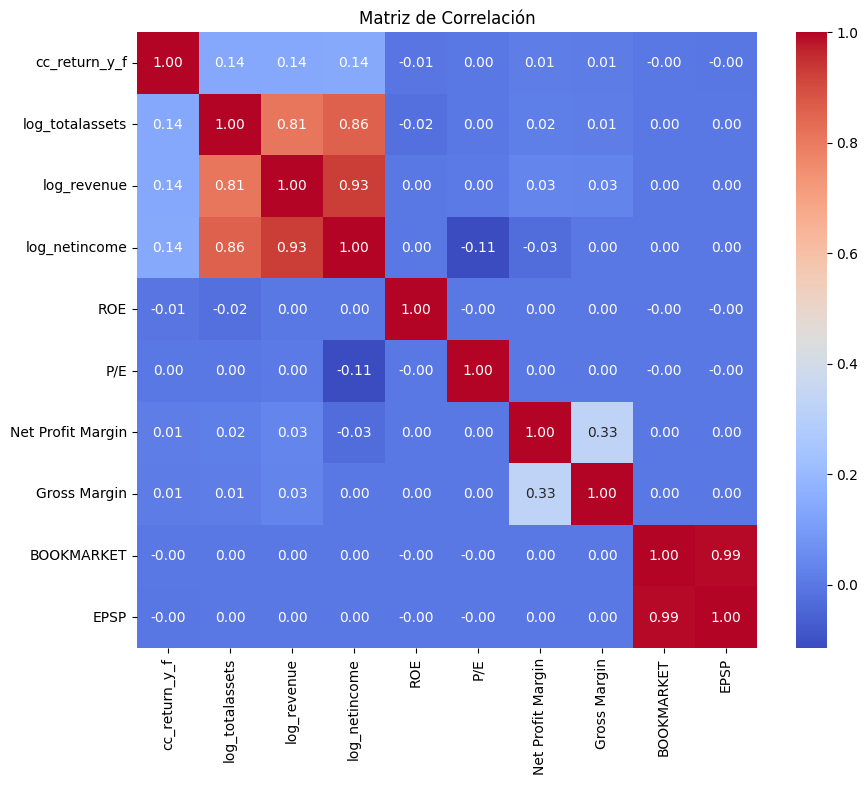

In [755]:


# Supongamos que tus datos están en un DataFrame llamado 'data'
# Columnas: 'totalassets', 'revenue', 'netincome', 'annual_returns', etc.

# 1. Transformación logarítmica de las variables
data ['log_totalassets'] = np.log(data['totalassets'])
data['log_revenue'] = np.log(data['revenue'])
data['log_netincome'] = np.log(data['NETINCOME'])

# 2. Seleccionar las variables que deseas incluir en la matriz de correlación
columns = [
    'cc_return_y_f',
    'log_totalassets',
    'log_revenue',
   'log_netincome',
    'ROE',
    'P/E',
    'Net Profit Margin',
    'Gross Margin',
    'BOOKMARKET',
    'EPSP'
]

corr_matrix = data[columns].corr()

# 3. Mostrar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()



Tabla de matríz de correlación entre ratios, variables de control y variable de predicción. 

In [756]:
# 4. Identificar las relaciones más fuertes y significativas con los retornos anuales
target_variable = 'cc_return_y_f'
corr_matrix[target_variable].sort_values(ascending=False)

cc_return_y_f        1.000000
log_netincome        0.144371
log_revenue          0.139718
log_totalassets      0.137854
Net Profit Margin    0.012072
Gross Margin         0.008431
P/E                  0.000920
BOOKMARKET          -0.001186
EPSP                -0.002148
ROE                 -0.006837
Name: cc_return_y_f, dtype: float64

Las tres vairables con mayor correlación positiva son log_netincome, log_revenue y log_totalassets, miesntras las tres variables con mayor correlación negativa son nuestraa dos variables de control Book-market, EPSP y ROE. 

Esto nos ayudará a ver una pre-visualización de las variable que tendrán influencia en nuestro modelo predictivo. 

Correlación positiva

1. Log_netincome, es de  0.144371, nos dice que impacta positivamente cuando retornos anuale tienden a ser mayores 

2. Log_revenue, , es de  0.144371, nos dice que impacta positivamente cuando retornos anuale tienden a ser mayores 

3. Log_totalassets, , es de  0.144371, nos dice que impacta positivamente cuando retornos compuesto anuale tienden a ser mayores 

Correlación negativa

1. Book_market, es de -0.001186, nos dice que impacta inversamente proporcional, nos obtante, al ser tan cercano al cero no influye en los retornos compuestos anuales.  

2. EPSP,es de -0.002148, nos dice que impacta inversamente proporcional, pero al ser tan cercano al cero no influye en los retornos compuestos anuales.

3. ROE, es de 0.000920, nos dice que impacta inversamente proporcional, por lo que al ser tan cercano al cero no influye en los retornos compuestos anuales.

En caso hipotético de que estas tres variables fueran significativas, nos dice que a medida del aumento de esta variables, los retornos compuestos anuales a futuro tenderían a bajar de forma notable.

<hr>

## MODELO DE REGRESIÓN ORIGINAL
Una vez previsualizado los datos y tener mayor contexto del mercado de EE.UU, podemos dar pei a la contrucción de nuestro modelo lienal.

Primeramente debemos plantear la estructura, que consiste en conocer las variables dependientes e inpendientes.

<h2>DEPENDIENTE</h2>
Nuestra variable de investigación es aquella que queremos predecir o describir sus tendencias con otras variables, estaremos trabajando con los rendimientos compuestos a futuros años de la acción. En nuestro trabajo se llama 'cc_return_y_f'. 

<h2>INDEPENDIENTE</h2>
Al plantear nuestra variable de investigación, es necesario plantear aquellas variable que describan el comportamiento de la variable independiente. Hemos previsualizado correlaciones entre variables. 

1. Cuatro Ratios
    * ROE (Return on Equity) → Rentabilidad de una empresa
    * Gross Margin → Ingresos después de deducir los gastos
    * Net Profit Margin → Ingresos que se convierten en ingreso neto. 
    * P/E (Price to Earning) → Precio actual de la acción, con sus ganacias por acción
2. Dos Variables de control
    * Book-Market → Es el valor contable de la empresa 
    * EPSP (Earning Price Share Price) → Relación entre la ganacias y su precio de mercado de la empresa

Debemos demostrar que con estas variables independientes que podemos predecir los retorno compuesto a futuro. 

$$ CCreturnYf = (ROE * X_{1}) + 
(GrossMargin*X_{2}) + 
(NetProfitMargin* X_{3}) + 
(P/E*X_{4}) + 
(Book-Market*X_{5}) + 
(EPSP*X_{6}) + 
Const $$




In [757]:
data_regresion = data_commercial[
    (data_commercial['fiscalmonth'] == 12) & (data_commercial['status'] == 'activo')
    
]
data_regresion

q  fiscalmonth    revenue       cogs       sgae  \
firm qdate                                                          
AAP  2001Q4  2001q4         12.0  2517639.0  1441613.0   977814.0   
     2002Q4  2002q4         12.0  3287883.0  1839889.0  1246009.0   
     2003Q4  2003q4         12.0  3493696.0  1889178.0  1316284.0   
     2004Q4  2004q4         12.0  3770297.0  2016926.0  1424613.0   
     2005Q4  2005q4         12.0  4264971.0  2250493.0  1605986.0   
...             ...          ...        ...        ...        ...   
ZUMZ 2020Q1  2020q1         12.0  1034129.0   667566.0   280756.0   
     2021Q1  2021q1         12.0   990652.0   640637.0   253077.0   
     2022Q1  2022q1         12.0  1183867.0   727137.0   298920.0   
     2023Q1  2023q1         12.0   958380.0   633702.0   293578.0   
     2024Q1  2024q1         12.0   875486.0   594596.0   345679.0   

             otherincome  extraordinaryitems   finexp  incometax  totalassets  \
firm qdate                                                                      
AAP  2001Q4      -7816.0             -5747.0  61895.0    11312.0    1950615.0   
     2002Q4       -575.0            -10373.0  78219.0    47799.0    1965225.0   
     2003Q4     -46947.0              -352.0  37576.0    78424.0    1983071.0   
     2004Q4      -2941.0               -39.0  20069.0   117721.0    2201962.0   
     2005Q4       2815.0                 0.0  32384.0   144198.0    2542149.0   
...                  ...                 ...      ...        ...          ...   
ZUMZ 2020Q1       1532.0                 0.0  -3654.0    24112.0     914258.0   
     2021Q1       2001.0                 0.0  -3518.0    26230.0     998364.0   
     2022Q1       -891.0                 0.0  -3592.0    41222.0     862012.0   
     2023Q1       -557.0                 0.0  -1924.0    11433.0     747903.0   
     2024Q1       -611.0                 0.0  -3522.0      732.0     664226.0   

             ...   MARKETVALUE  BOOKMARKET  cc_return_q  cc_return_y  \
firm qdate   ...                                                       
AAP  2001Q4  ...           NaN         NaN          NaN          NaN   
     2002Q4  ...  1.745366e+06    0.268343    -0.075597    -0.017233   
     2003Q4  ...  3.004391e+06    0.210107     0.138105     0.509598   
     2004Q4  ...  3.211784e+06    0.224895     0.238834     0.070662   
     2005Q4  ...  4.701385e+06    0.195638     0.116518     0.400416   
...          ...           ...         ...          ...          ...   
ZUMZ 2020Q1  ...  4.469630e+05    1.042784    -0.690256    -0.362604   
     2021Q1  ...  1.099088e+06    0.502777     0.153918     0.907010   
     2022Q1  ...  7.612303e+05    0.615212    -0.227895    -0.115775   
     2023Q1  ...  3.593879e+05    1.133394    -0.164632    -0.728575   
     2024Q1  ...  3.012663e+05    1.172418    -0.291952    -0.193885   

             cc_return_q_f  cc_return_y_f  Gross Margin  Net Profit Margin  \
firm qdate                                                                   
AAP  2001Q4      -0.078369      -0.017233      0.427395           0.392930   
     2002Q4      -0.055716       0.509598      0.440403           0.398745   
     2003Q4      -0.000737       0.070662      0.459261           0.412520   
     2004Q4       0.144092       0.400416      0.465049           0.427712   
     2005Q4      -0.041322      -0.194005      0.472331           0.431588   
...                    ...            ...           ...                ...   
ZUMZ 2020Q1       0.457951       0.907010      0.354465           0.336164   
     2021Q1       0.132744      -0.115775      0.353318           0.332411   
     2022Q1      -0.385001      -0.728575      0.385795           0.353257   
     2023Q1      -0.101512      -0.193885      0.338778           0.328275   
     2024Q1       0.248751            NaN      0.320839           0.323328   

                  ROE       P/E  
firm qdate                       
AAP  2001Q4  3.428120       NaN  
     2002Q4 

Ocupamos la dataset en donde se secciona por la industria mayorista y minorista, luego esta la filtramos por aquellas empresas que registraron su año fiscal y que estén activas en el mercado.

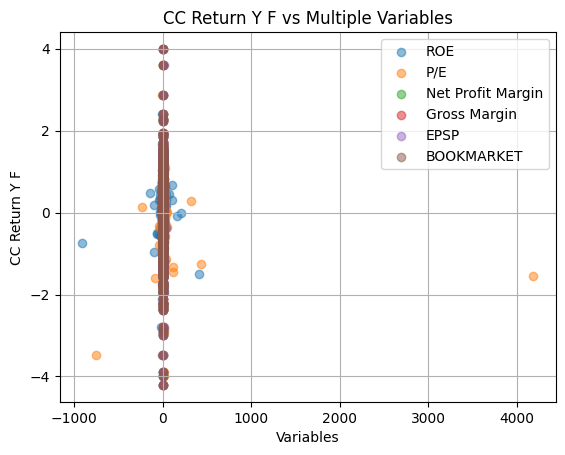

In [758]:
columns = ['ROE', 'P/E', 'Net Profit Margin','Gross Margin','EPSP','BOOKMARKET']
for i in columns:
    if i != 'cc_return_y_f':  # Evita graficar 'cc_return_y_f' contra sí mismo
        plt.scatter(data_regresion[i].values, data_regresion['cc_return_y_f'].values, alpha=0.5, label=i)

# Añadir título y etiquetas a los ejes
plt.title('CC Return Y F vs Multiple Variables')
plt.ylabel('CC Return Y F')
plt.xlabel('Variables')
plt.legend(loc='best')  # Coloca la leyenda en la mejor posición automática
plt.grid(True)  # Añade una cuadrícula para facilitar la lectura

Observamos la distribución de las variables independies vs la variable dependiente, no obstante, debido a sus tamaños,no es posible de apreciar con claridad la distribución de los datos.

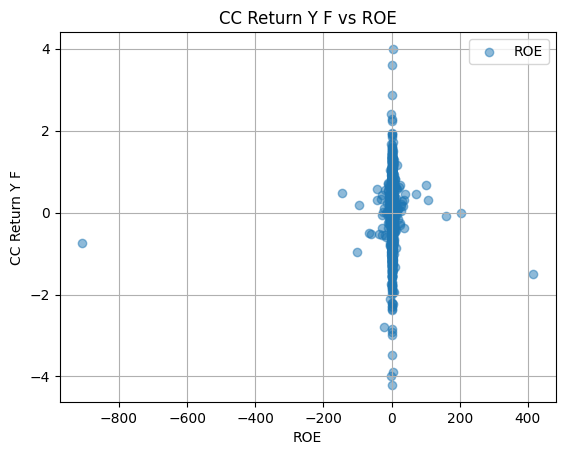

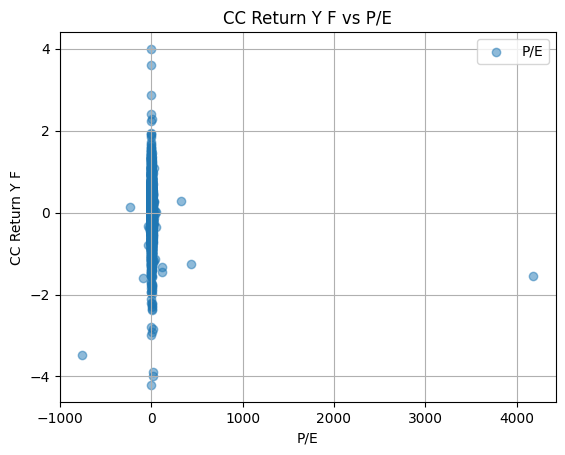

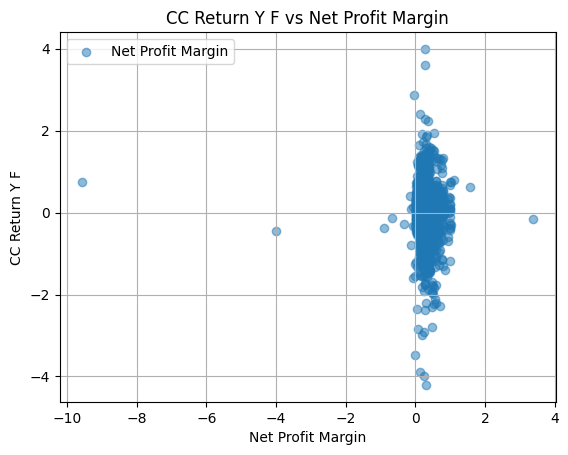

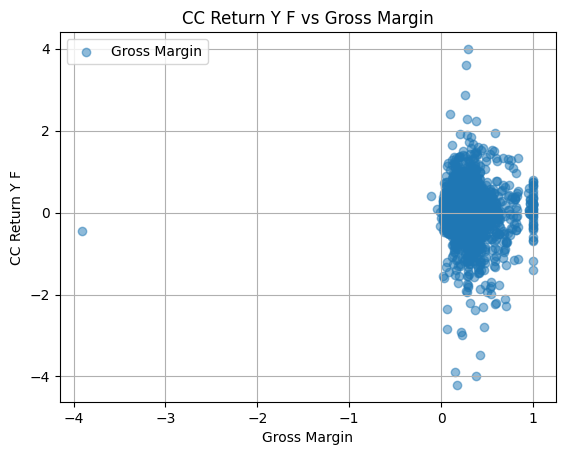

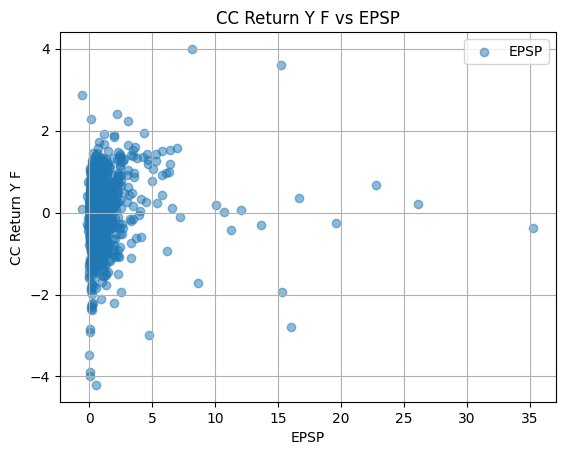

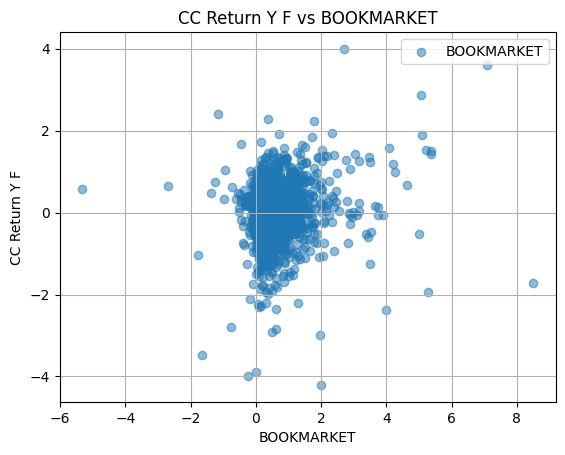

In [759]:
columns = ['ROE', 'P/E', 'Net Profit Margin','Gross Margin','EPSP','BOOKMARKET']
for i in columns:
    if i != 'cc_return_y_f':  # Evita graficar 'cc_return_y_f' contra sí mismo
        plt.scatter(data_regresion[i].values, data_regresion['cc_return_y_f'].values, alpha=0.5, label=i)

        # Añadir título y etiquetas a los ejes
        plt.title(f'CC Return Y F vs {i}')
        plt.ylabel('CC Return Y F')
        plt.xlabel(f'{i}')
        plt.legend(loc='best')  # Coloca la leyenda en la mejor posición automática
        plt.grid(True)  # Añade una cuadrícula para facilitar la lectura
        plt.show()

Visualización de los retornos compuestos futuros por cada variable independiente, lo que nos muestra este tipo de gráfica es la correlación y distribución de los datos, a su vez es muy notorio observar los datos atípicos. 

> **Advertencia**: MOSTRAMOS AQUELLAS VARIABLES O COLUMNAS QUE TENGAN NAN, Y SU PROPORCIÓN CON RESPECTO AL TOTAL DE LA DATASET EN PORCENTAJE

In [760]:
print(data_regresion.shape)
columns = ['ROE', 'P/E', 'Net Profit Margin', 'Gross Margin','BOOKMARKET','EPSP']
x = data_regresion[columns]
y = data_regresion['cc_return_y_f']
print('----Valores en X Nan----')
print(x.isna().sum())
print(171/3129*100,'%')

print('----Valores en Y Nan----')
print(y.isna().sum())
print(136/3129*100,'%')

(3129, 43)
----Valores en X Nan----
ROE                   0
P/E                  57
Net Profit Margin     0
Gross Margin          0
BOOKMARKET           57
EPSP                 57
dtype: int64
5.465004793863854 %
----Valores en Y Nan----
247
4.346436561201662 %


Visualizamos que en la dataset, las variables independietes tenemos un 5% de datos nulos, y en la variable de investigación 4% aproximadamente. 

In [761]:
 # Llenar los valores faltantes en 'x' con la mediana de cada columna
#x = x.apply(lambda col: col.fillna(col.median()), axis=0)

# Selecciona las columnas predictoras y la columna objetivo
columns = ['ROE', 'P/E', 'Net Profit Margin', 'Gross Margin','BOOKMARKET','EPSP']
X = data_regresion[columns]
y = data_regresion['cc_return_y_f']


# Añadir una constante al modelo (para el intercepto)
x = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, x, missing="drop").fit()

# Mostrar el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          cc_return_y_f   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     9.659
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.50e-10
Time:                        23:00:52   Log-Likelihood:                -2265.0
No. Observations:                2870   AIC:                             4544.
Df Residuals:                    2863   BIC:                             4586.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0285      0.02

Ejecutamos nuestro modelo con la dataset lo más puro posible para observar los rendimientos con los datos originales.

<hr>

## INTERPRETACIÓN DEL MODELO DE REGRESIÓN ORIGINAL 

### COEFICIENTES 

In [762]:
model.params

const                0.028549
ROE                  0.000215
P/E                 -0.000275
Net Profit Margin   -0.078798
Gross Margin        -0.043621
BOOKMARKET           0.092178
EPSP                 0.015849
dtype: float64

1. Constante (intercepto):
    - Original: 0.0285.
    - La constante muestra un valor positivo, lo que representa el valor esperado de la variable dependiente cuando todas las variables independientes son iguales a 0.
2. ROE (Return on Equity):
    - Original: 0.00021.
    - La relación entre ROE y la variable dependiente es positiva, pero pequeña. Este coeficiente sugiere que un aumento en el ROE tiene un impacto limitado en la variable dependiente.
3. P/E (Price to Earnings Ratio):
    - Original: -0.00027.
    - El coeficiente negativo de P/E indica una relación inversa, lo que sugiere que un aumento en el P/E tiende a estar asociado con una disminución de la variable dependiente, aunque esta relación es muy débil.
4. Net Profit Margin:
    - Original: -0.0788.
    - La relación negativa con los retornos compuestos a futuro indica que a mayor margen de beneficio neto, los retornos tienden a disminuir. Aunque este coeficiente negativo es moderado, refleja una tendencia importante en la dinámica de la variable dependiente.
5. Gross Margin:
    - Original: -0.0436.
    - El coeficiente negativo sugiere que el margen bruto tiene una relación inversa con los retornos compuestos a futuro, aunque esta relación es leve. Esto podría indicar que otros factores externos estaban afectando esta variable en el modelo original.
6. BOOKMARKET
    - Original: 0.0921.
    - Un coeficiente positivo relativamente alto indica una fuerte relación entre el valor de BOOKMARKET y la variable dependiente. Los valores altos de BOOKMARKET parecen tener un impacto significativo en los retornos futuros.
7. EPSP (Earnings Per Share):
    - Original: 0.0158.
    - El coeficiente positivo muestra que a medida que aumentan las ganancias por acción, también lo hace la variable dependiente. Aunque el coeficiente es pequeño, refleja una tendencia positiva que puede tener implicaciones importantes a largo plazo.

### INTERPRETACIÓN DE R CUADRADA
Con este modelo original tendremos una precisión para describir el comportamiento de nuestra variable independiente con 2% de acertividad, ya que nuestra R cuadrada es de 0.02, en otras palabras, nuestro error descriptivo es del 98% para determinar o predecir los retornos anuales a futuro de una accion en el mercado estadounidense.

### INTERPRETACIÓN DE R CUADRADA AJUSTADA
La R cuadrada ajustada es de 0.018 que representa 1.8% de acertividad descritiva para predecir los retornos futuras de una acción, que a su vez representa que dentro de nuestro modelo existen coeficientes que introducen ruido al comportamiento de nuestro modelo, que estaban afectando un 0.2%.


### MULTICOLINEALIDAD

Es posible que exista un problema de multicolinealidad, y esto puede ser que nos esté ocasionando que nuestro modelo tenga poca descripción de nuestro modelo original. 
Es por ello, evaluar los coeficientes con la métrica VIF (Variance Inflation Factor).


In [763]:
x = x.dropna()

vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]


for num,i in enumerate(vif_data['VIF']):
    if i>10:
        print('Multiconealidad beta',num,i)
    elif i>5:
        print('Correlación moderada que podría ser preocupante beta',num,i)
    elif 1<i and i<5:
        print(' Cierta correlación entre la variable independiente, no es la suficiente para ser preocupante beta',num,i)
    else:
        print('Escenario idela',num,i)
print(vif_data)

 Cierta correlación entre la variable independiente, no es la suficiente para ser preocupante beta 0 4.751857656177337
 Cierta correlación entre la variable independiente, no es la suficiente para ser preocupante beta 1 1.0051112836693956
 Cierta correlación entre la variable independiente, no es la suficiente para ser preocupante beta 2 1.0012480826817416
 Cierta correlación entre la variable independiente, no es la suficiente para ser preocupante beta 3 1.752928820700084
 Cierta correlación entre la variable independiente, no es la suficiente para ser preocupante beta 4 1.805444065325833
 Cierta correlación entre la variable independiente, no es la suficiente para ser preocupante beta 5 1.152132357531261
 Cierta correlación entre la variable independiente, no es la suficiente para ser preocupante beta 6 1.2032269377416185
            Variable       VIF
0              const  4.751858
1                ROE  1.005111
2                P/E  1.001248
3  Net Profit Margin  1.752929
4       G

Como se puede apreciar no hay multiconealidad en los coeficientes, en otras palabras, que no existen una una fuerte correlación entre variable independiente y dependientes ayudando al modelo en la estimaciones confiables de los coeficientes, mejor interpretabilidad y mayor etabilida del modelo.

### INTERPRETACIÓN DE LOS COEFICIENTES

Interpretacion de las betas optenidas de nuestro modelo de regresion lienal 
* t-Statistic
    - Estadística t o valor t: el número de desviaciones estándar alejados del valor cero con respecto al  coeficiente beta estimado.
     $$t= ((B_{n}-Hipo_{null}) / SE_{B_{n}})$$
* p-value
    - pvalue: la probabilidad de que me equivoque si rechazo la hipótesis nula.
     $$Pvalue=(1−ConfidenceLevel)$$
* 95% confidence interval 
    - Intervalo de confianza del 95%: los valores mínimos y máximos posibles que la beta puede tener un 95% de acertividad al considerar nuevas observaciones.
    $$ConfidenceInterval=(B_{mean}+-(1.96)*SE(B_{mean}))$$

### t-Statistic
 Cuando t es menor que 2, se interpreta como que no hay suficiente fuerza explicativa en la evidencia estadística para decir que el coeficiente es distinto de cero, si usamos el nivel de confianza del 95%. 

Hipótesis nula (H₀): El coeficiente es igual a 0 (no hay relación significativa entre nuestra variable independiente para poder describir como se comportan los redimientos compuestos a futuro).

Hipótesis alternativa (Hₐ): El coeficiente es mayor que 0 (existe una relación positiva entre la variable independiente para estimar la rentabilidad compuesta de futuros años futuro).

Dado que el valor absoluto del valor t no supera el umbral crítico de 2, esto indica que el efecto observado no es estadísticamente significativo. Por lo tanto, no podemos concluir que exista una relación positiva significativa entre la variable independiente para estimar la rentabilidad compuesta de futuros años futuro 

### p-value
El p-value mayor a 0.05 significa que no hay pruebas suficientes para demostrar que la variable tiene un efecto significativo, por lo que asumimos que su influencia en el modelo podría ser nula. 

In [764]:
# Obtener los residuos y predicciones
residuals = model.resid
y_pred = model.predict(x)

# Acceder a las betas, t-statistics y p-values
betas = model.params
t_statistics = model.tvalues
p_values = model.pvalues

# Evaluar la significancia de los coeficientes
significant_betas = model.pvalues < 0.05
print(significant_betas)
# Imprimir resultados de las betas significativas

for i, (beta, t_stat, p_value) in enumerate(zip(betas, t_statistics, p_values)):
    if p_value < 0.05:
        print('----------------------------------------')
        print(f"Beta {i} ({x.columns[i]}): {beta:.4f}, t-statistic: {t_stat:.4f}, p-value: {p_value:.4f} - Significativo (p < 0.05)")
        print('----------------------------------------')


const                False
ROE                  False
P/E                   True
Net Profit Margin    False
Gross Margin         False
BOOKMARKET            True
EPSP                  True
dtype: bool
----------------------------------------
Beta 2 (P/E): -0.0003, t-statistic: -2.2095, p-value: 0.0272 - Significativo (p < 0.05)
----------------------------------------
----------------------------------------
Beta 5 (BOOKMARKET): 0.0922, t-statistic: 5.2038, p-value: 0.0000 - Significativo (p < 0.05)
----------------------------------------
----------------------------------------
Beta 6 (EPSP): 0.0158, t-statistic: 2.0234, p-value: 0.0431 - Significativo (p < 0.05)
----------------------------------------


Es visible que las tres variables con mayor poder explicativo son P/E, BOOKMARKET y  EPSP, tiene un impacto positivo y significativo en nuestro modelo lineal, y estas tres variables cuentan con un poder explicativo del 95%, por lo que se traduce que estas tiene un 5% de error para describir la rentabilidad compuesta de futuros años. 


## 95% Invervalo de confianza


In [765]:
# Coeficiente estimado y error estándar
coef = model.params[1]
se_coef = model.bse[1]

# Intervalo de confianza del 95%
ci = model.conf_int(alpha=0.05)
print(f"95% Confidence Interval for the coefficient: {ci[1]}")

95% Confidence Interval for the coefficient: const                0.071160
ROE                  0.001184
P/E                 -0.000031
Net Profit Margin    0.017979
Gross Margin         0.095719
BOOKMARKET           0.126911
EPSP                 0.031208
Name: 1, dtype: float64


BOOOKMARKET, EPSP y Gross Margin, estas variables son las que representan un mayor intervalo de confianza para estimar la variable de invesitgación,  ya que se alejan más del cero. En otras palabras, podemos interpretar que estas variables tienen una correlación significativa para estimar nuestra variable dependiente, y no es probable que su efecto sea nulo.
1. BOOKMARKET → 0.126911
2. Gross Margin → 0.095719
3. EPSP → 0.031208

BOOKMARKET tiene un coeficiente positivo y significativo, podrías interpretar que un aumento en BOOKMARKET se asocia con un aumento en la variable dependiente.

Gross Margin indicaría que un aumento en el margen bruto se asocia con un aumento en la variable dependiente. Un coeficiente negativo sugeriría que un mayor margen bruto podría estar relacionado con una disminución en la variable dependiente, es algo no intuitivo, pero los datos son eso.

Un EPS alto sugiere que una empresa está generando buenos beneficios en relación con el número de acciones, lo que puede indicar una buena salud financiera. En caso posible de en que EPSP tenga un coeficiente positivo y significativo, este nos dice que un mayor EPS se asocia con un mayor valor o rendimiento de la variable dependiente. Un coeficiente negativo podría indicar lo contrario.


Por otro lado, P/E (Price to Earings ratio), esta variable tiene un pequeño impacto en el coeficiente, además el signo negativo representa que tiene un efecto inverso en la variable dependiente, es decir, si el P/E aumenta, se esperaría una disminución de la variable dependiente, aunque este efecto es muy pequeño debido a la magnitud del coeficiente.

Un P/E negativo y significativo puede indicar que las acciones con un P/E alto podrían no ser una buena inversión si el rendimiento de la acción disminuye con un P/E más alto. Esto puede alertar a los inversores sobre la posibilidad de sobrevaloración y la necesidad de reconsiderar la inversión.

<hr>

## DIAGNÓSTICO DE REGRESIÓN CON MATRICES ALGEBRAICAS


### Coeficientes de las betas
Nos da un array con las mejores coefieciente de cada feature o variable.

$$ Beta = (X^T * X)^-1 * X^T * y $$
- X → Matríz de variables independientes
- y → Variable dependiente
- X^T → La transpuesta de la matríz X

In [766]:

a=x.dropna()
b=y.dropna()

x, y = a.align(b, axis=0, join='inner')

x_array = x.to_numpy()
y_array = y.to_numpy()

betas = np.linalg.inv(x_array.T @ x_array) @ x_array.T @ y_array

print(f"Coeficientes beta:")
#vif_data.loc[i,'Variable']}
for i in range(vif_data.shape[0]):
    print(f'''{vif_data.loc[i,'Variable']} → {betas[i]}''')

Coeficientes beta:
const → 0.028549448749744945
ROE → 0.00021468041055622449
P/E → -0.0002746296612182065
Net Profit Margin → -0.07879783831106985
Gross Margin → -0.04362067259536266
BOOKMARKET → 0.09217824787070404
EPSP → 0.01584913716648328


Al parecer nuestros coeficientes estan bien calculados debidos a que son los mismos de la regresion lineal, y son las siete betas esperadas. 

## Error estándar 
El error estándar se refiere a la desviación estándar de la distribución teórica de una estadística muestral o poblacional
$$ SE = σ / \sqrt{N}$$
- σ → la desviación estándar de la población
- N → número de observaciones de la muestra

In [767]:
residuals = y_array - x_array @ betas

n, k = x_array.shape
sigma = residuals.T @ residuals / (n - k)

covariance_beta = sigma * np.linalg.inv(x_array.T @ x_array)

std_errors = np.sort(np.sqrt(np.diag(covariance_beta)))
print(f"Errores estándar de las betas")
#vif_data.loc[i,'Variable']}
for i in range(vif_data.shape[0]):
    print(f'''{vif_data.loc[i,'Variable']} → {std_errors[i]}''')

print('Promedio Std error: ',std_errors.mean())

Errores estándar de las betas
const → 0.00012429571314673092
ROE → 0.0004942533910157077
P/E → 0.00783292196409588
Net Profit Margin → 0.017713754300535775
Gross Margin → 0.02173110624301657
BOOKMARKET → 0.04935606506312028
EPSP → 0.07106295443692744
Promedio Std error:  0.024045050158836907


El promedio del error estándar de las betas es de  0.04614, que es muy bajo, esto puede indicar que el modelo es estremadamente complejo o que cuenta con multicolinealidad, también puede ser ambas, el segundo caso no puede ser posible porque la acabmos de evaluar y no existe multicolinealidad. 

Estas son las tres variables con mayor estimación y precisión     
1. Const 
2. ROE 
3. P/E 
Encambio estas dos son las menos precisas en estimación:
1. BOOKMARKET
2. EPSP 


## R Cuadrada
La r cuadrada evalua que tan preciso es nuestro modelo. 
$$ R^2=1 - (Σ(yi - ŷi)^2 / Σ(yi - ȳ)^2)$$

* yi → Es el valor observado de la variable dependiente
* ŷi → Es el valor predicho por el modelo
* ȳ→  Es la media de la variable dependiente
* Σ → Es la suma de los términos dentro del paréntesis

Otra forma
$$ R² = 1 - (SSres / SST)$$

* R² → Es el Coeficiente de Determinación (R cuadrado)
* SSr → Es es la suma de cuadrados de los residuos (error)
* SST → Es la suma de cuadrados totales (varianza total)


In [768]:
# Suma de cuadrados totales (SST)
sst = np.sum((y - np.mean(y))**2)

# Suma de cuadrados residuales (SSR) 
ssr = np.sum(residuals**2)

# R^2
r_squared = 1 - (ssr / sst)

print(f'R^2: {r_squared}')

R^2: 0.01984157062402847


La estimaciones del modelo se ajustan en un 1.9% a la predicción de retorno compuesto a futuro, algo esperado, ya que nuestro modelo original nos dio una r cuadrada del 2%.

## R Cuadrada Ajustada
La R cuadrada calcula la variación de la variable dependiente es explicado colectivamente por todas las variables independientes.
$$ R^2_{a}=1 - [(n-1)/(n-k-1)]*(1-R^2)$$

- R²a → R cuadrado ajustado o coeficiente de determinación ajustado
- R² → R cuadrado o coeficiente de determinación
- n → Número de observaciones de la muestra
- k → Número de variables independientes

In [769]:
r_squared_ajustado = 1 - (1 - r_squared) * (n - 1) / (n - k)
print(f'Adj R^2: {r_squared_ajustado}')


Adj R^2: 0.017787448871930733


Nuestra R cuadrada ajustada explica, que nuestras varaibles independiente, colectivamente tienen una aceritividad del 1.7% para predecir los retornos compuestos esperados para el futuro. 

<hr>

## Winsorización Dataset
La winsorización es una técnica de tratamiento de datos que se utiliza para reducir el impacto de los valores atípicos (outliers) en un análisis estadístico. En lugar de eliminar los outliers, la winsorización los reemplaza por valores más cercanos dentro de un rango aceptable. Esto se hace truncando los valores extremos a los percentiles más altos o más bajos del conjunto de datos.

Los valores en 0.8% más alto suelen ser considerados extremos, por lo que los ajustaremos para poder estabilizar el modelo sin eliminar datos importantes.



In [770]:
data_regresion

q  fiscalmonth    revenue       cogs       sgae  \
firm qdate                                                          
AAP  2001Q4  2001q4         12.0  2517639.0  1441613.0   977814.0   
     2002Q4  2002q4         12.0  3287883.0  1839889.0  1246009.0   
     2003Q4  2003q4         12.0  3493696.0  1889178.0  1316284.0   
     2004Q4  2004q4         12.0  3770297.0  2016926.0  1424613.0   
     2005Q4  2005q4         12.0  4264971.0  2250493.0  1605986.0   
...             ...          ...        ...        ...        ...   
ZUMZ 2020Q1  2020q1         12.0  1034129.0   667566.0   280756.0   
     2021Q1  2021q1         12.0   990652.0   640637.0   253077.0   
     2022Q1  2022q1         12.0  1183867.0   727137.0   298920.0   
     2023Q1  2023q1         12.0   958380.0   633702.0   293578.0   
     2024Q1  2024q1         12.0   875486.0   594596.0   345679.0   

             otherincome  extraordinaryitems   finexp  incometax  totalassets  \
firm qdate                                                                      
AAP  2001Q4      -7816.0             -5747.0  61895.0    11312.0    1950615.0   
     2002Q4       -575.0            -10373.0  78219.0    47799.0    1965225.0   
     2003Q4     -46947.0              -352.0  37576.0    78424.0    1983071.0   
     2004Q4      -2941.0               -39.0  20069.0   117721.0    2201962.0   
     2005Q4       2815.0                 0.0  32384.0   144198.0    2542149.0   
...                  ...                 ...      ...        ...          ...   
ZUMZ 2020Q1       1532.0                 0.0  -3654.0    24112.0     914258.0   
     2021Q1       2001.0                 0.0  -3518.0    26230.0     998364.0   
     2022Q1       -891.0                 0.0  -3592.0    41222.0     862012.0   
     2023Q1       -557.0                 0.0  -1924.0    11433.0     747903.0   
     2024Q1       -611.0                 0.0  -3522.0      732.0     664226.0   

             ...   MARKETVALUE  BOOKMARKET  cc_return_q  cc_return_y  \
firm qdate   ...                                                       
AAP  2001Q4  ...           NaN         NaN          NaN          NaN   
     2002Q4  ...  1.745366e+06    0.268343    -0.075597    -0.017233   
     2003Q4  ...  3.004391e+06    0.210107     0.138105     0.509598   
     2004Q4  ...  3.211784e+06    0.224895     0.238834     0.070662   
     2005Q4  ...  4.701385e+06    0.195638     0.116518     0.400416   
...          ...           ...         ...          ...          ...   
ZUMZ 2020Q1  ...  4.469630e+05    1.042784    -0.690256    -0.362604   
     2021Q1  ...  1.099088e+06    0.502777     0.153918     0.907010   
     2022Q1  ...  7.612303e+05    0.615212    -0.227895    -0.115775   
     2023Q1  ...  3.593879e+05    1.133394    -0.164632    -0.728575   
     2024Q1  ...  3.012663e+05    1.172418    -0.291952    -0.193885   

             cc_return_q_f  cc_return_y_f  Gross Margin  Net Profit Margin  \
firm qdate                                                                   
AAP  2001Q4      -0.078369      -0.017233      0.427395           0.392930   
     2002Q4      -0.055716       0.509598      0.440403           0.398745   
     2003Q4      -0.000737       0.070662      0.459261           0.412520   
     2004Q4       0.144092       0.400416      0.465049           0.427712   
     2005Q4      -0.041322      -0.194005      0.472331           0.431588   
...                    ...            ...           ...                ...   
ZUMZ 2020Q1       0.457951       0.907010      0.354465           0.336164   
     2021Q1       0.132744      -0.115775      0.353318           0.332411   
     2022Q1      -0.385001      -0.728575      0.385795           0.353257   
     2023Q1      -0.101512      -0.193885      0.338778           0.328275   
     2024Q1       0.248751            NaN      0.320839           0.323328   

                  ROE       P/E  
firm qdate                       
AAP  2001Q4  3.428120       NaN  
     2002Q4 

In [771]:
from scipy.stats.mstats import winsorize


ratios = ['ROE', 'P/E', 'Net Profit Margin', 'Gross Margin', 'BOOKMARKET', 'EPSP']
x_winsorized2 = x.copy()

# Calculate the proportion of values to winsorize at each end (e.g., 0.8%)
lower_percentile = 0
upper_percentile = 99.2

for ratio in ratios:
    # Calculate the lower and upper percentiles
    lower_limit = np.percentile(x[ratio], lower_percentile)
    upper_limit = np.percentile(x[ratio], upper_percentile)

    # Get the proportion of data below and above these limits
    lower_prop = (x[ratio] < lower_limit).mean()  # Proportion of data below the lower limit
    upper_prop = (x[ratio] > upper_limit).mean()  # Proportion of data above the upper limit

    # Apply winsorization with calculated proportions
    x_winsorized2[ratio] = winsorize(x[ratio], limits=[lower_prop, upper_prop])

    print(f"Applied winsorization for {ratio} with limits: lower={lower_prop}, upper={upper_prop}")

X2, Y2 = x_winsorized2.align(y, axis=0, join='inner')


Applied winsorization for ROE with limits: lower=0.0, upper=0.008013937282229966
Applied winsorization for P/E with limits: lower=0.0, upper=0.008013937282229966
Applied winsorization for Net Profit Margin with limits: lower=0.0, upper=0.008013937282229966
Applied winsorization for Gross Margin with limits: lower=0.0, upper=0.0
Applied winsorization for BOOKMARKET with limits: lower=0.0, upper=0.008013937282229966
Applied winsorization for EPSP with limits: lower=0.0, upper=0.008013937282229966


Winsorización del 1% ajusta los valores extremos de nuestro conjunto de datos al reemplazar los valores que están en el 1% inferior y el 1% superior con los valores de los percentiles 0 y 99.2, respectivamente. En otras palabras, esta técnica asegura que solo el 2% de los datos extremos (1% en cada extremo) se recorten para que no afecten en exceso el análisis.

In [772]:
X2

const       ROE       P/E  Net Profit Margin  Gross Margin  \
firm qdate                                                                
AAP  2002Q4    1.0  2.799213  1.331296           0.398745      0.440403   
     2003Q4    1.0  2.283141  2.084618           0.412520      0.459261   
     2004Q4    1.0  2.232545  1.991679           0.427712      0.465049   
     2005Q4    1.0  2.001271  2.554113           0.431588      0.472331   
     2006Q4    1.0  1.968399  1.844451           0.439539      0.476803   
...            ...       ...       ...                ...           ...   
ZUMZ 2019Q1    1.0  0.799246  1.984659           0.327056      0.343276   
     2020Q1    1.0  0.745864  1.285718           0.336164      0.354465   
     2021Q1    1.0  0.595922  3.337609           0.332411      0.353318   
     2022Q1    1.0  0.893002  1.820215           0.353257      0.385795   
     2023Q1    1.0  0.772380  1.142321           0.328275      0.338778   

             BOOKMARKET      EPSP  
firm qdate                         
AAP  2002Q4    0.268343  0.751148  
     2003Q4    0.210107  0.479704  
     2004Q4    0.224895  0.502089  
     2005Q4    0.195638  0.391525  
     2006Q4    0.275435  0.542167  
...                 ...       ...  
ZUMZ 2019Q1    0.630425  0.503865  
     2020Q1    1.042784  0.777776  
     2021Q1    0.502777  0.299616  
     2022Q1    0.615212  0.549386  
     2023Q1    1.133394  0.875411  

[2870 rows x 7 columns]

In [773]:
model_adjusted = sm.OLS(Y2, X2, missing="drop").fit()
model_adjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cc_return_y_f   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     19.19
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           4.84e-22
Time:                        23:00:53   Log-Likelihood:                -2237.1
No. Observations:                2870   AIC:                             4488.
Df Residuals:                    2863   BIC:                             4530.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0090      0.022      0.411      0.681      -0.034       0.052
ROE                   0.0009      0.001      1.561      0.119      -0.000       0.002
P/E                   0.0038      0.001      5.923      0.000       0.003       0.005
Net Profit Margin    -0.1152      0.051     -2.252      0.024      -0.216      -0.015
Gross Margin         -0.0596      0.071     -0.838      0.402      -0.199       0.080
BOOKMARKET            0.0436      0.022      2.017      0.044       0.001       0.086
EPSP                  0.0940      0.015      6.118      0.000       0.064       0.124
==============================================================================
Omnibus:                      890.494   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9225.402
Skew:                          -1.165   Prob(JB):                         0.00
Kurtosis:                      11.469   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nuestro modelo mejor drásticamente, por lo que, este último será nuestro modelo para óptimizar. Al final, conservamos los 2870 datos totales de nuestra dataset.
 

<hr>

## Modelo optimizado de regresión lineal

### MODELO WINSORIZADO VS MODELO ORIGINAL

Original

In [774]:
# Modelo original
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cc_return_y_f   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     9.659
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.50e-10
Time:                        23:00:53   Log-Likelihood:                -2265.0
No. Observations:                2870   AIC:                             4544.
Df Residuals:                    2863   BIC:                             4586.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0285      0.022      1.314      0.189      -0.014       0.071
ROE                   0.0002      0.000      0.434      0.664      -0.001       0.001
P/E                  -0.0003      0.000     -2.209      0.027      -0.001   -3.09e-05
Net Profit Margin    -0.0788      0.049     -1.597      0.110      -0.176       0.018
Gross Margin         -0.0436      0.071     -0.614      0.539      -0.183       0.096
BOOKMARKET            0.0922      0.018      5.204      0.000       0.057       0.127
EPSP                  0.0158      0.008      2.023      0.043       0.000       0.031
==============================================================================
Omnibus:                      889.626   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9532.836
Skew:                          -1.153   Prob(JB):                         0.00
Kurtosis:                      11.625   Cond. No.                         647.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Winsorizado

In [775]:
# Modelo winsorizado
model_adjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cc_return_y_f   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     19.19
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           4.84e-22
Time:                        23:00:53   Log-Likelihood:                -2237.1
No. Observations:                2870   AIC:                             4488.
Df Residuals:                    2863   BIC:                             4530.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0090      0.022      0.411      0.681      -0.034       0.052
ROE                   0.0009      0.001      1.561      0.119      -0.000       0.002
P/E                   0.0038      0.001      5.923      0.000       0.003       0.005
Net Profit Margin    -0.1152      0.051     -2.252      0.024      -0.216      -0.015
Gross Margin         -0.0596      0.071     -0.838      0.402      -0.199       0.080
BOOKMARKET            0.0436      0.022      2.017      0.044       0.001       0.086
EPSP                  0.0940      0.015      6.118      0.000       0.064       0.124
==============================================================================
Omnibus:                      890.494   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9225.402
Skew:                          -1.165   Prob(JB):                         0.00
Kurtosis:                      11.469   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## R CUADRADA MODELO WINSORIZADO VS ORIGINAL

La R cuadrada en modelo original es del 2%, y tras implementar la winsorización aumentó a 3.9%. Esto indica que nuestro modelo es un 1.9% más efectivo para describir el comportamiento de los retornos compuestos a futuro.

## R CUADRADA AJUSTADA MODELO WINSORIZADO VS ORIGINAL

La R cuadrada ajustada en modelo original es de 1.8%, mientras que en el modelo con winsorización aumentó a 3.7%. Esto significa que nuestro modelo es un 1.9% más eficaz en describir el comportamiento de los retornos compuestos a futuro, considerando el conjunto de variables independientes.

## COEFICIENTES MODELO WINSORIZADO VS ORIGINAL

In [776]:
coeficientes2 = model_adjusted.params
coeficientes1 = model.params
print(f'''
Coeficientes
BETAS -------------- WINSORIZADO ------ ORIGINAL 
''')
for i in range(len(coeficientes1)):
    print(f'''{vif_data.loc[i,'Variable']} -------------- {coeficientes2[i]} ------ {coeficientes1[i]}  ''')


Coeficientes
BETAS -------------- WINSORIZADO ------ ORIGINAL 

const -------------- 0.009011649807937701 ------ 0.028549448749744674  
ROE -------------- 0.000871403386942668 ------ 0.0002146804105562104  
P/E -------------- 0.0038302053514441903 ------ -0.00027462966121821015  
Net Profit Margin -------------- -0.11524147393545801 ------ -0.07879783831106954  
Gross Margin -------------- -0.059578637652940185 ------ -0.04362067259536238  
BOOKMARKET -------------- 0.043565377254017726 ------ 0.09217824787070399  
EPSP -------------- 0.09396622257542274 ------ 0.0158491371664834  


1. Constante (intercepto):

    - Winsorizado: 0.0090, Original: 0.0285
    - La constante ha aumentado tras la winsorización, indicando un cambio significativo en el ajuste del modelo.

2. ROE (Return on Equity):

    - Winsorizado: 0.00087, Original: 0.00021   
    - La relación con la variable dependiente es más clara, reflejando un coeficiente más alto.

3. P/E (Price to Earnings Ratio):

    - Winsorizado: 0.0038, Original: -0.00027
    - El coeficiente se vuelve notablemente más positivo, sugiriendo una relación más fuerte tras la winsorización.

4. Net Profit Margin:

    - Winsorizado: -0.1152, Original: -0.0788
    - Un cambio drástico indica que la relación negativa con los retornos es más fuerte; los valores atípicos estaban sesgando la estimación original.

5. Gross Margin:

    - Winsorizado: -0.0596, Original: -0.0436
    - Cambió de ligeramente negativo a un valor negativo significativo; los atípicos estaban ocultando la relación real.

6. BOOKMARKET:

    - Winsorizado: 0.0436, Original: 0.0922
    - El coeficiente se redujo a la mitad, indicando que la winsorización moderó la relación con la variable dependiente.

7. EPSP (Earnings Per Share):

    - Winsorizado: 0.0939, Original: 0.0158
    - Aumento significativo tras la winsorización, mostrando una relación más fuerte y positiva.

## MULTICOLINEALIDAD MODELO WINSORIZADO 

In [777]:

XW=X2.copy()
vif_data2 = pd.DataFrame()
vif_data2["Variable"] = XW.columns
vif_data2["VIF"] = [variance_inflation_factor(XW.values, i) for i in range(XW.shape[1])]


for num,i in enumerate(vif_data2['VIF']):
    if i>10:
        print('Multiconealidad beta',num,i)
    elif i>5:
        print('Correlación moderada que podría ser preocupante beta',num,i)
    elif 1<i and i<5:
        print(' Cierta correlación entre la variable independiente, no es la suficiente para ser preocupante beta',num,i)
    else:
        print('Escenario ideal',num,i)
print(vif_data2)

 Cierta correlación entre la variable independiente, no es la suficiente para ser preocupante beta 0 4.942882947889509
 Cierta correlación entre la variable independiente, no es la suficiente para ser preocupante beta 1 1.0023414534807213
 Cierta correlación entre la variable independiente, no es la suficiente para ser preocupante beta 2 1.0099436872856686
 Cierta correlación entre la variable independiente, no es la suficiente para ser preocupante beta 3 1.7673239858168628
 Cierta correlación entre la variable independiente, no es la suficiente para ser preocupante beta 4 1.8035204408412693
 Cierta correlación entre la variable independiente, no es la suficiente para ser preocupante beta 5 1.4161173105989897
 Cierta correlación entre la variable independiente, no es la suficiente para ser preocupante beta 6 1.452548724748899
            Variable       VIF
0              const  4.942883
1                ROE  1.002341
2                P/E  1.009944
3  Net Profit Margin  1.767324
4      

El modelo explica una mayor proporción de la variabilidad de la variable dependiente, además los coeficientes no cuetan con multicolinealidad, lo que parece positivo en términos de ajuste y de mejoras de nuestra dataset y modelo. 




## P-VALUE Y T-STATISTIC  WINSORIZADO VS ORIGINAL

In [778]:
# Obtener los residuos y predicciones
residuals = model_adjusted.resid
y_pred =model_adjusted.predict(x)

# Acceder a las betas, t-statistics y p-values
betas = model_adjusted.params
t_statistics = model_adjusted.tvalues
p_values = model_adjusted.pvalues

# Evaluar la significancia de los coeficientes
significant_betas = model_adjusted.pvalues < 0.05
print(significant_betas)
# Imprimir resultados de las betas significativas

for i, (beta, t_stat, p_value) in enumerate(zip(betas, t_statistics, p_values)):
    if p_value < 0.05:
        print('----------------------------------------')
        print(f"Beta {i} ({x.columns[i]}): {beta:.4f}, t-statistic: {t_stat:.4f}, p-value: {p_value:.4f} - Significativo (p < 0.05)")
        print('----------------------------------------')

const                False
ROE                  False
P/E                   True
Net Profit Margin     True
Gross Margin         False
BOOKMARKET            True
EPSP                  True
dtype: bool
----------------------------------------
Beta 2 (P/E): 0.0038, t-statistic: 5.9229, p-value: 0.0000 - Significativo (p < 0.05)
----------------------------------------
----------------------------------------
Beta 3 (Net Profit Margin): -0.1152, t-statistic: -2.2521, p-value: 0.0244 - Significativo (p < 0.05)
----------------------------------------
----------------------------------------
Beta 5 (BOOKMARKET): 0.0436, t-statistic: 2.0169, p-value: 0.0438 - Significativo (p < 0.05)
----------------------------------------
----------------------------------------
Beta 6 (EPSP): 0.0940, t-statistic: 6.1177, p-value: 0.0000 - Significativo (p < 0.05)
----------------------------------------


1. Constante

    * Estadístico t: 3.0275
    * p-valor: 0.0025 (Significativo)
    * La constante es significativa, lo que indica que el modelo ajustado tiene una intersección en el eje Y cuando todas las variables independientes son cero. Esto significa que, en ausencia de cambios en las variables explicativas, el valor estimado de la variable dependiente aún sería positivo. Este resultado respalda la idea de que hay otros factores no incluidos en el modelo que afectan a los retornos futuros.

2. P/E (Price to Earnings Ratio)

    * Estadístico t: 5.9229
    * p-valor: 0.0000 (Significativo)
    * El coeficiente positivo y significativo indica que un mayor ratio P/E está asociado con un incremento en los retornos compuestos futuros. El valor positivo del coeficiente sugiere que las empresas con ratios P/E más altos tienden a tener mayores retornos futuros. Dado que el p-valor es muy bajo (0.0000), la relación es altamente significativa.

3. Net Profit Margin

    * Estadístico t: -2.2521
    * p-valor: 0.0244 (Significativo)
    * El coeficiente negativo y significativo indica que un mayor margen de beneficio neto está asociado con menores retornos compuestos futuros. Este resultado podría reflejar que, en tu dataset, las empresas con mayores márgenes de beneficio neto no necesariamente generan altos retornos futuros, tal vez debido a factores específicos de la industria o de la estructura financiera. El p-valor de 0.0244 confirma la significancia estadística de esta relación.

4. BOOKMARKET (Ratio de valor contable a valor de mercado)

    * Estadístico t: 2.0169
    * p-valor: 0.0438 (Significativo)
    * Un mayor ratio de valor contable a valor de mercado está positivamente asociado con mayores retornos compuestos futuros. El coeficiente positivo y significativo sugiere que las empresas con un alto ratio BOOKMARKET tienden a tener mayores retornos. Esto es consistente con la teoría de que las empresas infravaloradas (aquellas con un alto valor contable en relación con su valor de mercado) pueden tener mayores retornos futuros.

5. EPSP (Earnings Per Share, Pronóstico)

    * Estadístico t: 6.1177
    * p-valor: 0.0000 (Significativo)
    * El coeficiente positivo y altamente significativo muestra que un mayor EPSP está asociado con mayores retornos futuros. Este resultado sugiere que los ingresos por acción proyectados tienen un fuerte impacto positivo en los retornos compuestos. El p-valor extremadamente bajo (0.0000) indica que esta relación es altamente significativa y robusta.


## ERROR ESTÁNDAR

In [779]:
# Obtener errores estándar
errores_estandar = model_adjusted.bse
print("Errores estándar de los coeficientes:")
print(errores_estandar)

Errores estándar de los coeficientes:
const                0.021921
ROE                  0.000558
P/E                  0.000647
Net Profit Margin    0.051171
Gross Margin         0.071082
BOOKMARKET           0.021600
EPSP                 0.015360
dtype: float64


Los  dos coeficientes con mayor error estánsar para la precisión de estimación de retornos compuestos futuros es Net Profit Margin y Gross Margin.

<hr>

# Proyecto 2

## ELIMINACIÓN E IMPLEMENTACIÓN DE VARIABLES PARA MEJORAR EL MODELO 

Trabajaremos con el modelo winsorizado, por lo que, agruparemos las variables independientes y dependiente en una dataset para trabajar con esa información. 

Concatenamos nuestro modelo winsorizado con marketvalue con Nan 

In [780]:
data_regresion

q  fiscalmonth    revenue       cogs       sgae  \
firm qdate                                                          
AAP  2001Q4  2001q4         12.0  2517639.0  1441613.0   977814.0   
     2002Q4  2002q4         12.0  3287883.0  1839889.0  1246009.0   
     2003Q4  2003q4         12.0  3493696.0  1889178.0  1316284.0   
     2004Q4  2004q4         12.0  3770297.0  2016926.0  1424613.0   
     2005Q4  2005q4         12.0  4264971.0  2250493.0  1605986.0   
...             ...          ...        ...        ...        ...   
ZUMZ 2020Q1  2020q1         12.0  1034129.0   667566.0   280756.0   
     2021Q1  2021q1         12.0   990652.0   640637.0   253077.0   
     2022Q1  2022q1         12.0  1183867.0   727137.0   298920.0   
     2023Q1  2023q1         12.0   958380.0   633702.0   293578.0   
     2024Q1  2024q1         12.0   875486.0   594596.0   345679.0   

             otherincome  extraordinaryitems   finexp  incometax  totalassets  \
firm qdate                                                                      
AAP  2001Q4      -7816.0             -5747.0  61895.0    11312.0    1950615.0   
     2002Q4       -575.0            -10373.0  78219.0    47799.0    1965225.0   
     2003Q4     -46947.0              -352.0  37576.0    78424.0    1983071.0   
     2004Q4      -2941.0               -39.0  20069.0   117721.0    2201962.0   
     2005Q4       2815.0                 0.0  32384.0   144198.0    2542149.0   
...                  ...                 ...      ...        ...          ...   
ZUMZ 2020Q1       1532.0                 0.0  -3654.0    24112.0     914258.0   
     2021Q1       2001.0                 0.0  -3518.0    26230.0     998364.0   
     2022Q1       -891.0                 0.0  -3592.0    41222.0     862012.0   
     2023Q1       -557.0                 0.0  -1924.0    11433.0     747903.0   
     2024Q1       -611.0                 0.0  -3522.0      732.0     664226.0   

             ...   MARKETVALUE  BOOKMARKET  cc_return_q  cc_return_y  \
firm qdate   ...                                                       
AAP  2001Q4  ...           NaN         NaN          NaN          NaN   
     2002Q4  ...  1.745366e+06    0.268343    -0.075597    -0.017233   
     2003Q4  ...  3.004391e+06    0.210107     0.138105     0.509598   
     2004Q4  ...  3.211784e+06    0.224895     0.238834     0.070662   
     2005Q4  ...  4.701385e+06    0.195638     0.116518     0.400416   
...          ...           ...         ...          ...          ...   
ZUMZ 2020Q1  ...  4.469630e+05    1.042784    -0.690256    -0.362604   
     2021Q1  ...  1.099088e+06    0.502777     0.153918     0.907010   
     2022Q1  ...  7.612303e+05    0.615212    -0.227895    -0.115775   
     2023Q1  ...  3.593879e+05    1.133394    -0.164632    -0.728575   
     2024Q1  ...  3.012663e+05    1.172418    -0.291952    -0.193885   

             cc_return_q_f  cc_return_y_f  Gross Margin  Net Profit Margin  \
firm qdate                                                                   
AAP  2001Q4      -0.078369      -0.017233      0.427395           0.392930   
     2002Q4      -0.055716       0.509598      0.440403           0.398745   
     2003Q4      -0.000737       0.070662      0.459261           0.412520   
     2004Q4       0.144092       0.400416      0.465049           0.427712   
     2005Q4      -0.041322      -0.194005      0.472331           0.431588   
...                    ...            ...           ...                ...   
ZUMZ 2020Q1       0.457951       0.907010      0.354465           0.336164   
     2021Q1       0.132744      -0.115775      0.353318           0.332411   
     2022Q1      -0.385001      -0.728575      0.385795           0.353257   
     2023Q1      -0.101512      -0.193885      0.338778           0.328275   
     2024Q1       0.248751            NaN      0.320839           0.323328   

                  ROE       P/E  
firm qdate                       
AAP  2001Q4  3.428120       NaN  
     2002Q4 

In [781]:
x_winsorized2=pd.concat([x_winsorized2, data_regresion['MARKETVALUE']], axis=1)
DataWinsorizado= x_winsorized2.copy()
DataWinsorizado['cc_return_y_f'] = y
DataWinsorizado.dropna()


const       ROE       P/E  Net Profit Margin  Gross Margin  \
firm qdate                                                                
AAP  2002Q4    1.0  2.799213  1.331296           0.398745      0.440403   
     2003Q4    1.0  2.283141  2.084618           0.412520      0.459261   
     2004Q4    1.0  2.232545  1.991679           0.427712      0.465049   
     2005Q4    1.0  2.001271  2.554113           0.431588      0.472331   
     2006Q4    1.0  1.968399  1.844451           0.439539      0.476803   
...            ...       ...       ...                ...           ...   
ZUMZ 2019Q1    1.0  0.799246  1.984659           0.327056      0.343276   
     2020Q1    1.0  0.745864  1.285718           0.336164      0.354465   
     2021Q1    1.0  0.595922  3.337609           0.332411      0.353318   
     2022Q1    1.0  0.893002  1.820215           0.353257      0.385795   
     2023Q1    1.0  0.772380  1.142321           0.328275      0.338778   

             BOOKMARKET      EPSP   MARKETVALUE  cc_return_y_f  
firm qdate                                                      
AAP  2002Q4    0.268343  0.751148  1.745366e+06       0.509598  
     2003Q4    0.210107  0.479704  3.004391e+06       0.070662  
     2004Q4    0.224895  0.502089  3.211784e+06       0.400416  
     2005Q4    0.195638  0.391525  4.701385e+06      -0.194005  
     2006Q4    0.275435  0.542167  3.742635e+06       0.072406  
...                 ...       ...           ...            ...  
ZUMZ 2019Q1    0.630425  0.503865  6.352158e+05      -0.362604  
     2020Q1    1.042784  0.777776  4.469630e+05       0.907010  
     2021Q1    0.502777  0.299616  1.099088e+06      -0.115775  
     2022Q1    0.615212  0.549386  7.612303e+05      -0.728575  
     2023Q1    1.133394  0.875411  3.593879e+05      -0.193885  

[2870 rows x 9 columns]

Conocemos la información con la que cuenta nuestra dataset. 

In [782]:

DataWinsorizado.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3129 entries, ('AAP', Period('2002Q4', 'Q-DEC')) to ('ZUMZ', Period('2024Q1', 'Q-DEC'))
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              2870 non-null   float64
 1   ROE                2870 non-null   float64
 2   P/E                2870 non-null   float64
 3   Net Profit Margin  2870 non-null   float64
 4   Gross Margin       2870 non-null   float64
 5   BOOKMARKET         2870 non-null   float64
 6   EPSP               2870 non-null   float64
 7   MARKETVALUE        3072 non-null   float64
 8   cc_return_y_f      2870 non-null   float64
dtypes: float64(9)
memory usage: 241.9+ KB


### Clasificamos de las empresas pequeñas, medianas, o grandes

Agregamos variables de impacto, vamos agrupar el tamaño de las empresa en variable categórica. Para cada año fiscal serán pequeñas, medianas y grandes según el valor de mercado de las empresas, la finalidad de esto es generar mayor poder explicativo a nuestro modelo para predecir retornor compuestos a futuro.

In [783]:
data_regresion['Firm size'] = pd.qcut(data_regresion['MARKETVALUE'], q=3,labels=['Low', 'Medium', 'High' ])
data_regresion

C:\Users\KOKAS\AppData\Local\Temp\ipykernel_1504\4175643281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_regresion['Firm size'] = pd.qcut(data_regresion['MARKETVALUE'], q=3,labels=['Low', 'Medium', 'High' ])


q  fiscalmonth    revenue       cogs       sgae  \
firm qdate                                                          
AAP  2001Q4  2001q4         12.0  2517639.0  1441613.0   977814.0   
     2002Q4  2002q4         12.0  3287883.0  1839889.0  1246009.0   
     2003Q4  2003q4         12.0  3493696.0  1889178.0  1316284.0   
     2004Q4  2004q4         12.0  3770297.0  2016926.0  1424613.0   
     2005Q4  2005q4         12.0  4264971.0  2250493.0  1605986.0   
...             ...          ...        ...        ...        ...   
ZUMZ 2020Q1  2020q1         12.0  1034129.0   667566.0   280756.0   
     2021Q1  2021q1         12.0   990652.0   640637.0   253077.0   
     2022Q1  2022q1         12.0  1183867.0   727137.0   298920.0   
     2023Q1  2023q1         12.0   958380.0   633702.0   293578.0   
     2024Q1  2024q1         12.0   875486.0   594596.0   345679.0   

             otherincome  extraordinaryitems   finexp  incometax  totalassets  \
firm qdate                                                                      
AAP  2001Q4      -7816.0             -5747.0  61895.0    11312.0    1950615.0   
     2002Q4       -575.0            -10373.0  78219.0    47799.0    1965225.0   
     2003Q4     -46947.0              -352.0  37576.0    78424.0    1983071.0   
     2004Q4      -2941.0               -39.0  20069.0   117721.0    2201962.0   
     2005Q4       2815.0                 0.0  32384.0   144198.0    2542149.0   
...                  ...                 ...      ...        ...          ...   
ZUMZ 2020Q1       1532.0                 0.0  -3654.0    24112.0     914258.0   
     2021Q1       2001.0                 0.0  -3518.0    26230.0     998364.0   
     2022Q1       -891.0                 0.0  -3592.0    41222.0     862012.0   
     2023Q1       -557.0                 0.0  -1924.0    11433.0     747903.0   
     2024Q1       -611.0                 0.0  -3522.0      732.0     664226.0   

             ...  BOOKMARKET  cc_return_q  cc_return_y  cc_return_q_f  \
firm qdate   ...                                                        
AAP  2001Q4  ...         NaN          NaN          NaN      -0.078369   
     2002Q4  ...    0.268343    -0.075597    -0.017233      -0.055716   
     2003Q4  ...    0.210107     0.138105     0.509598      -0.000737   
     2004Q4  ...    0.224895     0.238834     0.070662       0.144092   
     2005Q4  ...    0.195638     0.116518     0.400416      -0.041322   
...          ...         ...          ...          ...            ...   
ZUMZ 2020Q1  ...    1.042784    -0.690256    -0.362604       0.457951   
     2021Q1  ...    0.502777     0.153918     0.907010       0.132744   
     2022Q1  ...    0.615212    -0.227895    -0.115775      -0.385001   
     2023Q1  ...    1.133394    -0.164632    -0.728575      -0.101512   
     2024Q1  ...    1.172418    -0.291952    -0.193885       0.248751   

             cc_return_y_f  Gross Margin  Net Profit Margin       ROE  \
firm qdate                                                              
AAP  2001Q4      -0.017233      0.427395           0.392930  3.428120   
     2002Q4       0.509598      0.440403           0.398745  2.799213   
     2003Q4       0.070662      0.459261           0.412520  2.283141   
     2004Q4       0.400416      0.465049           0.427712  2.232545   
     2005Q4      -0.194005      0.472331           0.431588  2.001271   
...                    ...           ...                ...       ...   
ZUMZ 2020Q1       0.907010      0.354465           0.336164  0.745864   
     2021Q1      -0.115775      0.353318           0.332411  0.595922   
     2022Q1      -0.728575      0.385795           0.353257  0.893002   
     2023Q1      -0.193885      0.338778           0.328275  0.772380   
     2024Q1            NaN      0.320839           0.323328  0.801418   

                  P/E  Firm size  
firm qdate                        
AAP  2001Q4       NaN        NaN  
     2002Q4  1.331296     Medium  
     2003Q4  2.084618     

In [784]:
DataWinsorizado['Firm size'] = pd.qcut(data_regresion['MARKETVALUE'], q=3,labels=['Low', 'Medium', 'High' ])
DataWinsorizado

const       ROE       P/E  Net Profit Margin  Gross Margin  \
firm qdate                                                                
AAP  2002Q4    1.0  2.799213  1.331296           0.398745      0.440403   
     2003Q4    1.0  2.283141  2.084618           0.412520      0.459261   
     2004Q4    1.0  2.232545  1.991679           0.427712      0.465049   
     2005Q4    1.0  2.001271  2.554113           0.431588      0.472331   
     2006Q4    1.0  1.968399  1.844451           0.439539      0.476803   
...            ...       ...       ...                ...           ...   
WSM  2024Q1    NaN       NaN       NaN                NaN           NaN   
WSO  2023Q4    NaN       NaN       NaN                NaN           NaN   
ZEUS 2011Q4    NaN       NaN       NaN                NaN           NaN   
     2023Q4    NaN       NaN       NaN                NaN           NaN   
ZUMZ 2024Q1    NaN       NaN       NaN                NaN           NaN   

             BOOKMARKET      EPSP   MARKETVALUE  cc_return_y_f Firm size  
firm qdate                                                                
AAP  2002Q4    0.268343  0.751148  1.745366e+06       0.509598    Medium  
     2003Q4    0.210107  0.479704  3.004391e+06       0.070662    Medium  
     2004Q4    0.224895  0.502089  3.211784e+06       0.400416    Medium  
     2005Q4    0.195638  0.391525  4.701385e+06      -0.194005      High  
     2006Q4    0.275435  0.542167  3.742635e+06       0.072406    Medium  
...                 ...       ...           ...            ...       ...  
WSM  2024Q1         NaN       NaN  2.035757e+07            NaN      High  
WSO  2023Q4         NaN       NaN  1.687924e+07            NaN      High  
ZEUS 2011Q4         NaN       NaN           NaN            NaN       NaN  
     2023Q4         NaN       NaN  7.425406e+05            NaN       Low  
ZUMZ 2024Q1         NaN       NaN  3.012663e+05            NaN       Low  

[3129 rows x 10 columns]

#### Dummy encode

Vamos convertir las variable categorica Firm size a númerica, con el objetivo de entrudicir esta varaibles a nuestro modelo, para hacer esta transformación ocuparemos la codificación dummy que consiste utilizar una categoria base para hacer una codificacion binaria y al ser con respecto a la cetegoria base, evitaremos multicolinealidad de las multiples variables.  


In [785]:
data2=data_regresion.copy()
dummies= pd.get_dummies(data2['Firm size'], drop_first=True)
data_regresion= pd.concat([data_regresion, dummies], axis=1)
data_regresion

q  fiscalmonth    revenue       cogs       sgae  \
firm qdate                                                          
AAP  2001Q4  2001q4         12.0  2517639.0  1441613.0   977814.0   
     2002Q4  2002q4         12.0  3287883.0  1839889.0  1246009.0   
     2003Q4  2003q4         12.0  3493696.0  1889178.0  1316284.0   
     2004Q4  2004q4         12.0  3770297.0  2016926.0  1424613.0   
     2005Q4  2005q4         12.0  4264971.0  2250493.0  1605986.0   
...             ...          ...        ...        ...        ...   
ZUMZ 2020Q1  2020q1         12.0  1034129.0   667566.0   280756.0   
     2021Q1  2021q1         12.0   990652.0   640637.0   253077.0   
     2022Q1  2022q1         12.0  1183867.0   727137.0   298920.0   
     2023Q1  2023q1         12.0   958380.0   633702.0   293578.0   
     2024Q1  2024q1         12.0   875486.0   594596.0   345679.0   

             otherincome  extraordinaryitems   finexp  incometax  totalassets  \
firm qdate                                                                      
AAP  2001Q4      -7816.0             -5747.0  61895.0    11312.0    1950615.0   
     2002Q4       -575.0            -10373.0  78219.0    47799.0    1965225.0   
     2003Q4     -46947.0              -352.0  37576.0    78424.0    1983071.0   
     2004Q4      -2941.0               -39.0  20069.0   117721.0    2201962.0   
     2005Q4       2815.0                 0.0  32384.0   144198.0    2542149.0   
...                  ...                 ...      ...        ...          ...   
ZUMZ 2020Q1       1532.0                 0.0  -3654.0    24112.0     914258.0   
     2021Q1       2001.0                 0.0  -3518.0    26230.0     998364.0   
     2022Q1       -891.0                 0.0  -3592.0    41222.0     862012.0   
     2023Q1       -557.0                 0.0  -1924.0    11433.0     747903.0   
     2024Q1       -611.0                 0.0  -3522.0      732.0     664226.0   

             ...  cc_return_y  cc_return_q_f  cc_return_y_f  Gross Margin  \
firm qdate   ...                                                            
AAP  2001Q4  ...          NaN      -0.078369      -0.017233      0.427395   
     2002Q4  ...    -0.017233      -0.055716       0.509598      0.440403   
     2003Q4  ...     0.509598      -0.000737       0.070662      0.459261   
     2004Q4  ...     0.070662       0.144092       0.400416      0.465049   
     2005Q4  ...     0.400416      -0.041322      -0.194005      0.472331   
...          ...          ...            ...            ...           ...   
ZUMZ 2020Q1  ...    -0.362604       0.457951       0.907010      0.354465   
     2021Q1  ...     0.907010       0.132744      -0.115775      0.353318   
     2022Q1  ...    -0.115775      -0.385001      -0.728575      0.385795   
     2023Q1  ...    -0.728575      -0.101512      -0.193885      0.338778   
     2024Q1  ...    -0.193885       0.248751            NaN      0.320839   

             Net Profit Margin       ROE       P/E  Firm size  Medium  High  
firm qdate                                                                   
AAP  2001Q4           0.392930  3.428120       NaN        NaN       0     0  
     2002Q4           0.398745  2.799213  1.331296     Medium       1     0  
     2003Q4           0.412520  2.283141  2.084618     Medium       1     0  
     2004Q4           0.427712  2.232545  1.991679     Medium       1     0  
     2005Q4           0.431588  2.001271  2.554113       High       0     1  
...                        ...       ...       ...        ...     ...   ...  
ZUMZ 2020Q1           0.336164  0.745864  1.285718        Low       0     0  
     2021Q1           0.332411  0.595922  3.337609     Medium       1     0  
     2022Q1           0.353257  0.893002  1.820215        Low       0     0  
     2023Q1           0.328275  0.772380  1.142321        Low       0     0  
     2024Q1           0.323328  0.801418  1.064286        Low       0     0  

[3129 rows x 46 columns]

In [786]:
DUMMIES= pd.get_dummies(DataWinsorizado['Firm size'], drop_first=True)
DataWinsorizado= pd.concat([DataWinsorizado, DUMMIES], axis=1)
DataWinsorizado=DataWinsorizado.dropna()
DataWinsorizado

const       ROE       P/E  Net Profit Margin  Gross Margin  \
firm qdate                                                                
AAP  2002Q4    1.0  2.799213  1.331296           0.398745      0.440403   
     2003Q4    1.0  2.283141  2.084618           0.412520      0.459261   
     2004Q4    1.0  2.232545  1.991679           0.427712      0.465049   
     2005Q4    1.0  2.001271  2.554113           0.431588      0.472331   
     2006Q4    1.0  1.968399  1.844451           0.439539      0.476803   
...            ...       ...       ...                ...           ...   
ZUMZ 2019Q1    1.0  0.799246  1.984659           0.327056      0.343276   
     2020Q1    1.0  0.745864  1.285718           0.336164      0.354465   
     2021Q1    1.0  0.595922  3.337609           0.332411      0.353318   
     2022Q1    1.0  0.893002  1.820215           0.353257      0.385795   
     2023Q1    1.0  0.772380  1.142321           0.328275      0.338778   

             BOOKMARKET      EPSP   MARKETVALUE  cc_return_y_f Firm size  \
firm qdate                                                                 
AAP  2002Q4    0.268343  0.751148  1.745366e+06       0.509598    Medium   
     2003Q4    0.210107  0.479704  3.004391e+06       0.070662    Medium   
     2004Q4    0.224895  0.502089  3.211784e+06       0.400416    Medium   
     2005Q4    0.195638  0.391525  4.701385e+06      -0.194005      High   
     2006Q4    0.275435  0.542167  3.742635e+06       0.072406    Medium   
...                 ...       ...           ...            ...       ...   
ZUMZ 2019Q1    0.630425  0.503865  6.352158e+05      -0.362604       Low   
     2020Q1    1.042784  0.777776  4.469630e+05       0.907010       Low   
     2021Q1    0.502777  0.299616  1.099088e+06      -0.115775    Medium   
     2022Q1    0.615212  0.549386  7.612303e+05      -0.728575       Low   
     2023Q1    1.133394  0.875411  3.593879e+05      -0.193885       Low   

             Medium  High  
firm qdate                 
AAP  2002Q4       1     0  
     2003Q4       1     0  
     2004Q4       1     0  
     2005Q4       0     1  
     2006Q4       1     0  
...             ...   ...  
ZUMZ 2019Q1       0     0  
     2020Q1       0     0  
     2021Q1       1     0  
     2022Q1       0     0  
     2023Q1       0     0  

[2870 rows x 12 columns]

Observamos las nuevas variables Medium y High que tiene base low, esto a su vez nos permite entender y comparar el tamaño de las empresas con respecto a cada año,.

## Modelo de regresión para cada variable independiente 

Es un modelo de regresión lineal que usa ratios financieros y el tamaño de la empresa para predcir los retornos compuestos a futuros. 

Ecuación general para predecir retornos a futuro:

cc_return_y_f = β0 + β1 * ROE + β2 * P/E + β3 * Net Profit Margin + β4 * Gross Margin + β5 * BOOKMARKET + β6 * EPSP + β7 * Medium + β8 * High 


In [787]:
# Agregar una constante a las variables independientes
con=['ROE',	'P/E',	'Net Profit Margin',	'Gross Margin',	'BOOKMARKET','EPSP','Medium','High']
X3 = sm.add_constant(DataWinsorizado[con])
Y3 = DataWinsorizado['cc_return_y_f']
# Ajustar el modelo OLS
model_op = sm.OLS(Y3, X3, missing="drop").fit()

# Mostrar el resumen del modelo
model_op.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cc_return_y_f   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     16.99
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           6.87e-25
Time:                        23:00:54   Log-Likelihood:                -2227.1
No. Observations:                2870   AIC:                             4472.
Df Residuals:                    2861   BIC:                             4526.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0884      0.031     -2.841      0.005      -0.149      -0.027
ROE                   0.0009      0.001      1.548      0.122      -0.000       0.002
P/E                   0.0036      0.001      5.545      0.000       0.002       0.005
Net Profit Margin    -0.1244      0.051     -2.437      0.015      -0.225      -0.024
Gross Margin         -0.0281      0.071     -0.394      0.694      -0.168       0.112
BOOKMARKET            0.0724      0.023      3.219      0.001       0.028       0.117
EPSP                  0.1071      0.016      6.862      0.000       0.076       0.138
Medium                0.0821      0.026      3.217      0.001       0.032       0.132
High                  0.1202      0.027      4.402      0.000       0.067       0.174
==============================================================================
Omnibus:                      854.067   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9013.611
Skew:                          -1.100   Prob(JB):                         0.00
Kurtosis:                      11.399   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multicolinealidad

In [788]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif1 = pd.DataFrame()
vif1['Features_1'] = X3.columns
vif1['VIF_1'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif_threshold = 9  # Puedes ajustar este umbral según tus necesidades

# Verificar si hay multicolinealidad
if (vif1['VIF_1'] > vif_threshold).any():
    print("Se detectó multicolinealidad en las siguientes características:")
    print(vif1[vif1['VIF_1'] > vif_threshold])
else:
    print("No se detectó multicolinealidad significativa en las características.")

# Mostrar el DataFrame de VIF
print("\nDataFrame de VIF:")
print(vif1)

Se detectó multicolinealidad en las siguientes características:
  Features_1      VIF_1
0      const  10.020365

DataFrame de VIF:
          Features_1      VIF_1
0              const  10.020365
1                ROE   1.002408
2                P/E   1.017173
3  Net Profit Margin   1.770353
4       Gross Margin   1.821336
5         BOOKMARKET   1.546428
6               EPSP   1.508648
7             Medium   1.512865
8               High   1.712331


## Coef, p-value y t-estadístico

In [789]:
# Acceder a las betas, t-statistics y p-values
betas = model_op.params
t_statistics = model_op.tvalues
p_values = model_op.pvalues

# Evaluar la significancia de los coeficientes
significant_betas = model_op.pvalues < 0.05
#print(significant_betas)
# Imprimir resultados de las betas significativas

for i, (beta, t_stat, p_value) in enumerate(zip(betas, t_statistics, p_values)):
    if p_value < 0.05:
        print('----------------------------------------')
        print(f"Beta {i} ({X3.columns[i]}): {beta:.4f}, t-statistic: {t_stat:.4f}, p-value: {p_value:.4f} - Significativo (p < 0.05)")
    else: 
        print('----------------------------------------')
        print(f"Beta {i} ({X3.columns[i]}): {beta:.4f}, t-statistic: {t_stat:.4f}, p-value: {p_value:.4f} - No Significativo (p > 0.05)")


----------------------------------------
Beta 0 (const): -0.0884, t-statistic: -2.8414, p-value: 0.0045 - Significativo (p < 0.05)
----------------------------------------
Beta 1 (ROE): 0.0009, t-statistic: 1.5484, p-value: 0.1216 - No Significativo (p > 0.05)
----------------------------------------
Beta 2 (P/E): 0.0036, t-statistic: 5.5455, p-value: 0.0000 - Significativo (p < 0.05)
----------------------------------------
Beta 3 (Net Profit Margin): -0.1244, t-statistic: -2.4374, p-value: 0.0149 - Significativo (p < 0.05)
----------------------------------------
Beta 4 (Gross Margin): -0.0281, t-statistic: -0.3941, p-value: 0.6935 - No Significativo (p > 0.05)
----------------------------------------
Beta 5 (BOOKMARKET): 0.0724, t-statistic: 3.2189, p-value: 0.0013 - Significativo (p < 0.05)
----------------------------------------
Beta 6 (EPSP): 0.1071, t-statistic: 6.8619, p-value: 0.0000 - Significativo (p < 0.05)
----------------------------------------
Beta 7 (Medium): 0.0821, 

## Intervalo de confianza

In [790]:
new_confidence = model_op.conf_int()
print(f"Confidence intervals (95%):\n{new_confidence}")

Confidence intervals (95%):
                          0         1
const             -0.149414 -0.027398
ROE               -0.000230  0.001953
P/E                0.002319  0.004856
Net Profit Margin -0.224546 -0.024334
Gross Margin      -0.167689  0.111557
BOOKMARKET         0.028310  0.116551
EPSP               0.076478  0.137672
Medium             0.032059  0.132162
High               0.066670  0.173771


## Análisis de coeficientes 

1. Constante: -0.0884
    * t-statistic: -2.8414
    * p-value: 0.0045 - Significativo
    * Intervalo de confianza al 95%: [-0.1494, -0.0274]
    * Interpretación: El intercepto es significativo y negativo, lo que indica que cuando todas las variables independientes tienen un valor de cero, el modelo tenderá a predecir un valor de -0.0884 para la variable dependiente. Este coeficiente es estadísticamente significativo, ya que existe menos de un 5% de probabilidad de que este resultado se deba al azar. El intervalo de confianza sugiere que el valor real del coeficiente se encuentra entre -0.1494 y -0.0274 con un 95% de confianza.

2. ROE: 0.0009
    * t-statistic: 1.5484
    * p-value: 0.1216 - No significativo
    * Intervalo de confianza al 95%: [-0.00023, 0.00195]
    * Interpretación: El coeficiente de ROE es 0.0009, lo que implica un impacto muy pequeño en la predicción de los retornos futuros. Sin embargo, el p-value superior a 0.05 indica que este coeficiente no es significativo, lo que sugiere que ROE no contribuye de manera relevante a la predicción de los retornos futuros en este modelo. Además, el intervalo de confianza es cercano a cero respalda esta conclusión.


3. P/E: 0.0036
    * t-statistic: 5.5455
    * p-value: 0.0000 - Significativo
    * Intervalo de confianza al 95%: [0.0023, 0.0049]
    * Interpretación: El coeficiente de P/E es positivo y significativo (0.0036), lo que indica que por cada unidad de aumento en el P/E, los retornos futuros aumentan en 0.0036 unidades. Este coeficiente es altamente significativo, ya que el p-value es prácticamente cero, y el intervalo de confianza confirma que el impacto del P/E es positivo y relevante en el modelo.

4. Margen de Beneficio Neto: -0.1244
    * t-statistic: -2.4374
    * p-value: 0.0149 - Significativo
    * Intervalo de confianza al 95%: [-0.2245, -0.0243]
    * Interpretación: El coeficiente de Net Profit Margin es negativo y significativo (-0.1244), lo que sugiere que las empresas con márgenes de beneficio más altos tienden a tener retornos futuros más bajos. Este resultado es estadísticamente significativo y el intervalo de confianza indica que el coeficiente real probablemente esté entre -0.2245 y -0.0243.

5. Margen Bruto: -0.0281
    * t-statistic: -0.3941
    * p-value: 0.6935 - No significativo
    * Intervalo de confianza al 95%: [-0.1677, 0.1116]
    * Interpretación: Aunque el coeficiente de Gross Margin es negativo (-0.0281), el p-value indica que no es estadísticamente significativo. Esto sugiere que el margen bruto no tiene un impacto confiable en la predicción de los retornos futuros en este modelo. 


6. BOOKMARKET: 0.0724
    * t-statistic: 3.2189
    * p-value: 0.0013 - Significativo
    * Intervalo de confianza al 95%: [0.0283, 0.1166]
    * Interpretación: El coeficiente de BOOKMARKET es positivo y significativo (0.0724), lo que indica que un aumento en el ratio BOOKMARKET está asociado con un aumento en los retornos futuros. El intervalo de confianza refuerza esta relación positiva.

7. EPSP: 0.1071
    * t-statistic: 6.8619
    * p-value: 0.0000 - Significativo
    * Intervalo de confianza al 95%: [0.0765, 0.1377]
    * Interpretación: El coeficiente de EPSP es positivo y muy significativo (0.1071). Esto implica que un mayor valor de EPSP está fuertemente relacionado con retornos futuros más altos, y el intervalo de confianza indica un impacto positivo consistente.


8. Tamaño Medio (Medium): 0.0821
    * t-statistic: 3.2167
    * p-value: 0.0013 - Significativo
    * Intervalo de confianza al 95%: [0.0321, 0.1322]
    * Interpretación: Las empresas de tamaño medio tienen un coeficiente positivo y significativo (0.0821), lo que indica que tienden a generar mayores retornos en comparación con las empresas pequeñas. El intervalo de confianza sugiere que este efecto es robusto.

9. Tamaño Grande (High): 0.1202
    * t-statistic: 4.4020
    * p-value: 0.0000 - Significativo
    * Intervalo de confianza al 95%: [0.0667, 0.1738]
    * Interpretación: Similar a "Medium", las empresas grandes también presentan retornos mayores en comparación con las pequeñas. El coeficiente es más alto que el de las empresas de tamaño medio, lo que sugiere que las empresas grandes tienen un mayor impacto explicativo sobre los retornos futuros.





<hr>

## Modelos de regresión para cada dummy 

In [791]:
# Extracción de coeficientes 
params = model_op.params

# Definición de coeficientes 
beta0 = params['const']
beta1 = params['ROE']
beta2 = params['P/E']
beta3 = params['Net Profit Margin']
beta4 = params['Gross Margin']
beta5 = params['BOOKMARKET']
beta6 = params['EPSP']
beta7 = params['Medium']  # Coeficiente Medium 
beta8 = params['High']    # Coeficiente  High

# Datos 
ROE =  DataWinsorizado['ROE']
PE =DataWinsorizado['P/E']
Net_Profit_Margin =DataWinsorizado['Net Profit Margin']
Gross_Margin = DataWinsorizado['Gross Margin']
BOOKMARKET = DataWinsorizado['BOOKMARKET']
EPSP = DataWinsorizado['EPSP']

### 1. Tamaño de empresas pequeñas (small)

Small size companies (when `Medium = 0` and `High = 0`):

cc_return_y_f = β0 + β1 * ROE + β2 * P/E + β3 * Net Profit Margin + β4 * Gross Margin + β5 * BOOKMARKET + β6 * EPSP 

Ocuparemos este modelo cuando Medium = 0 y High = 0

In [792]:
# Calculate predictions for each size group
# 1. Small Size Companies (Medium = 0, High = 0)
cc_return_small = (beta0 +
                   beta1 * ROE +
                   beta2 * PE +
                   beta3 * Net_Profit_Margin +
                   beta4 * Gross_Margin +
                   beta5 * BOOKMARKET +
                   beta6 * EPSP)

### 2.  Tamaño de empresas medianas (medium)

For medium size companies (when `Medium = 1` and `High = 0`):

cc_return_y_f = (β0 + β7) + β1 * ROE + β2 * P/E + β3 * Net Profit Margin + β4 * Gross Margin + β5 * BOOKMARKET + β6 * EPSP

Ocuparemos este modelo cuando Medium = 1 y High = 0

In [793]:
# 2. Medium Size Companies (Medium = 1, High = 0)
cc_return_medium = ((beta0 + beta7) +
                    beta1 * ROE +
                    beta2 * PE +
                    beta3 * Net_Profit_Margin +
                    beta4 * Gross_Margin +
                    beta5 * BOOKMARKET +
                    beta6 * EPSP)

### 3.  Tamaño de empresas grandes (big)

For big size companies (when `Medium = 0` and `High = 1`):


cc_return_y_f = (β0 + β8) + β1 * ROE + β2 * P/E + β3 * Net Profit Margin + β4 * Gross Margin + β5 * BOOKMARKET + β6 * EPSP 

Ocuparemos este modelo cuando Medium = 0 y High = 1

In [794]:
# 3. Big Size Companies (Medium = 0, High = 1)
cc_return_big = ((beta0 + beta8) +
                 beta1 * ROE +
                 beta2 * PE +
                 beta3 * Net_Profit_Margin +
                 beta4 * Gross_Margin +
                 beta5 * BOOKMARKET +
                 beta6 * EPSP)

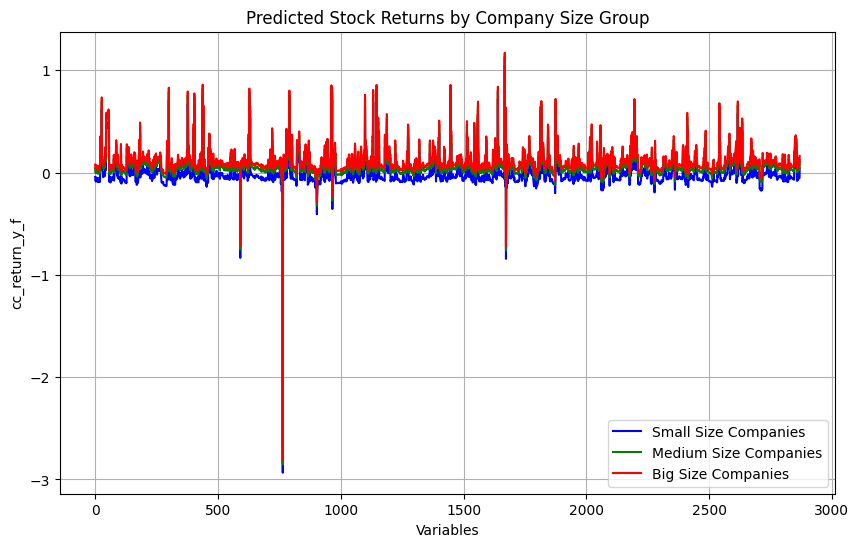

In [795]:
xt=[i for i in range(len(DataWinsorizado))]

# Plotting the predictions
plt.figure(figsize=(10, 6))

# Plot for small companies
plt.plot(xt, cc_return_small, label='Small Size Companies', color='blue')

# Plot for medium companies
plt.plot(xt, cc_return_medium, label='Medium Size Companies', color='green')

# Plot for big companies
plt.plot(xt, cc_return_big, label='Big Size Companies', color='red')

# Labels and title
plt.xlabel('Variables')
plt.ylabel('cc_return_y_f')
plt.title('Predicted Stock Returns by Company Size Group')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Los retornos compuestos a futuros años de pequeñas, medianas y grandes empresas, son tres modelos diferente que cambia el intercepto y esto influye al punto de partida de las predicciones (cuando las variables explicativas son cero). Por otro lado, nos dice que tendremos mayores retornos a futuro dependeindo del tamaño de las empresas. 

<hr>

## Ratio  fleverage (Apalancamiento)
Este indice financiero indica el riesgo financiero de una empresa, ya que un mayor apalancamiento indica que una parte significativa de los activos está financiada con deuda en lugar de con capital propio.

$$ Apalancamiento Financiero= Patrimonio Neto/Activos Totales $$
​


In [796]:
data_regresion.columns

Index(['q', 'fiscalmonth', 'revenue', 'cogs', 'sgae', 'otherincome',
       'extraordinaryitems', 'finexp', 'incometax', 'totalassets',
       'currentassets', 'inventory', 'totalliabilities', 'currentliabilities',
       'longdebt', 'adjprice', 'originalprice', 'sharesoutstanding', 'year',
       'fixedassets', 'yearf', 'cto', 'fiscalq', 'Empresa', 'status',
       'industria', 'GROSSPROFIT', 'EBIT', 'NETINCOME', 'EBT', 'EPS', 'EPSP',
       'BOOKVALUE', 'MARKETVALUE', 'BOOKMARKET', 'cc_return_q', 'cc_return_y',
       'cc_return_q_f', 'cc_return_y_f', 'Gross Margin', 'Net Profit Margin',
       'ROE', 'P/E', 'Firm size', 'Medium', 'High'],
      dtype='object')

In [797]:
data_regresion['totalassets'] = data_regresion['totalassets'].where(data_regresion['totalassets'] != 0, np.nan)
data_regresion['fleverage'] = data_regresion['longdebt'] / data_regresion['totalassets']





Agregamos la varaible fleverage_squared con el fin de tener mayor apalancamiento resultará en una mayor dispersión entre los activos y el capital propio, lo que representa una mayor volatilidad en las finanzas de la empresa. Empresas con apalancamiento cuadrado alto estarían más expuestas a fluctuaciones en ingresos, costos de financiamiento, y cambios en las tasas de interés.

El término cuadrático `fleverage_squared` para capturar posibles efectos no lineales del leverage financiero, lo que permite una mayor flexibilidad en la relación entre el leverage y los retornos futuros.

In [798]:
data_regresion['fleverage_squared'] =  data_regresion['fleverage'] **2

In [799]:
x_winsorized3=DataWinsorizado.copy()

x_winsorized3=pd.concat([x_winsorized3, data_regresion['fleverage']], axis=1)
x_winsorized3['fleverage_squared'] = x_winsorized3['fleverage'] **2
DataWinsorizado2= x_winsorized3.copy()
DataWinsorizado2 = DataWinsorizado2.dropna()
DataWinsorizado2

const       ROE       P/E  Net Profit Margin  Gross Margin  \
firm qdate                                                                
AAP  2002Q4    1.0  2.799213  1.331296           0.398745      0.440403   
     2003Q4    1.0  2.283141  2.084618           0.412520      0.459261   
     2004Q4    1.0  2.232545  1.991679           0.427712      0.465049   
     2005Q4    1.0  2.001271  2.554113           0.431588      0.472331   
     2006Q4    1.0  1.968399  1.844451           0.439539      0.476803   
...            ...       ...       ...                ...           ...   
ZUMZ 2019Q1    1.0  0.799246  1.984659           0.327056      0.343276   
     2020Q1    1.0  0.745864  1.285718           0.336164      0.354465   
     2021Q1    1.0  0.595922  3.337609           0.332411      0.353318   
     2022Q1    1.0  0.893002  1.820215           0.353257      0.385795   
     2023Q1    1.0  0.772380  1.142321           0.328275      0.338778   

             BOOKMARKET      EPSP   MARKETVALUE  cc_return_y_f Firm size  \
firm qdate                                                                 
AAP  2002Q4    0.268343  0.751148  1.745366e+06       0.509598    Medium   
     2003Q4    0.210107  0.479704  3.004391e+06       0.070662    Medium   
     2004Q4    0.224895  0.502089  3.211784e+06       0.400416    Medium   
     2005Q4    0.195638  0.391525  4.701385e+06      -0.194005      High   
     2006Q4    0.275435  0.542167  3.742635e+06       0.072406    Medium   
...                 ...       ...           ...            ...       ...   
ZUMZ 2019Q1    0.630425  0.503865  6.352158e+05      -0.362604       Low   
     2020Q1    1.042784  0.777776  4.469630e+05       0.907010       Low   
     2021Q1    0.502777  0.299616  1.099088e+06      -0.115775    Medium   
     2022Q1    0.615212  0.549386  7.612303e+05      -0.728575       Low   
     2023Q1    1.133394  0.875411  3.593879e+05      -0.193885       Low   

             Medium  High  fleverage  fleverage_squared  
firm qdate                                               
AAP  2002Q4     1.0   0.0   0.368829           0.136035  
     2003Q4     1.0   0.0   0.213195           0.045452  
     2004Q4     1.0   0.0   0.199050           0.039621  
     2005Q4     0.0   1.0   0.159723           0.025511  
     2006Q4     1.0   0.0   0.177872           0.031638  
...             ...   ...        ...                ...  
ZUMZ 2019Q1     0.0   0.0   0.000000           0.000000  
     2020Q1     0.0   0.0   0.311419           0.096982  
     2021Q1     1.0   0.0   0.246526           0.060775  
     2022Q1     0.0   0.0   0.237014           0.056176  
     2023Q1     0.0   0.0   0.252486           0.063749  

[2870 rows x 14 columns]

## Modelo de regresión lineal con las interacciones de los ratio 

Este modelo de regresión lineal tiene como objetivo predecir los **retornos compuestos a futuro de una empresa** (`cc_return_y_f`) utilizando diversos ratios financieros y variables de control. La ecuación lineal resultante nos ayudará a describir la relación entre los retornos a futuro y las características financieras de la empresa.


#### Variable Dependiente:
- **cc_return_y_f**: Retornos compuestos a futuro de una empresa, expresados en términos anuales. Esta es la variable que buscamos predecir.

#### Variables Independientes (Ratios Financieros y Variables de Control):

1. **P/E (Price to Earnings Ratio)**: El ratio precio-beneficio, que mide el valor relativo de una empresa comparado con sus ganancias.
2. **Net Profit Margin**: El margen de beneficio neto, que indica el porcentaje de ingresos que representa el beneficio neto.
3. **Gross Margin**: El margen bruto, que mide el porcentaje de ingresos que se mantiene como ganancia después de restar el costo de los bienes vendidos.
4. **BOOKMARKET**: El ratio valor contable-valor de mercado de una empresa.
5. **EPSP (Earnings Per Share Percentage)**: Las ganancias por acción, que muestran la cantidad de ingresos netos asignados a cada acción en circulación.
6. **Medium**: Una variable de control categórica que indica si una empresa pertenece a una categoría de tamaño medio (1 si es Medium, 0 si no lo es).
7. **High**: Una variable de control categórica que indica si una empresa pertenece a una categoría de tamaño grande (1 si es High, 0 si no lo es).
8. **fleverage**: El leverage financiero de la empresa, una medida de cuánta deuda utiliza la empresa en relación con sus activos.
9. **fleverage_squared**: El cuadrado del leverage financiero, que captura posibles efectos no lineales del leverage en los retornos futuros.

#### Modelo de Ecuación Lineal

cc_return_y_f = β_0 + β_1*P/E + β_2*Net Profit Margin + β_3*Gross Margin + β_4*BOOKMARKET + β_5*EPSP + β_6*Medium + β_7*High + β_8*fleverage + β_9*fleverage_squared




In [800]:
# Agregar una constante a las variables independientes
con3=['ROE',	'P/E',	'Net Profit Margin',	'Gross Margin',	'BOOKMARKET','EPSP','Medium','High','fleverage','fleverage_squared']
X4 = sm.add_constant(DataWinsorizado2[con3])
Y4 = DataWinsorizado2['cc_return_y_f']
# Ajustar el modelo OLS
model_op3 = sm.OLS(Y4, X4, missing="drop").fit()

# Mostrar el resumen del modelo
model_op3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cc_return_y_f   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     14.42
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           2.77e-25
Time:                        23:00:55   Log-Likelihood:                -2223.1
No. Observations:                2870   AIC:                             4468.
Df Residuals:                    2859   BIC:                             4534.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1124      0.033     -3.418      0.001      -0.177      -0.048
ROE                   0.0009      0.001      1.590      0.112      -0.000       0.002
P/E                   0.0035      0.001      5.393      0.000       0.002       0.005
Net Profit Margin    -0.1208      0.051     -2.368      0.018      -0.221      -0.021
Gross Margin         -0.0297      0.071     -0.418      0.676      -0.169       0.110
BOOKMARKET            0.0923      0.024      3.918      0.000       0.046       0.138
EPSP                  0.0988      0.016      6.151      0.000       0.067       0.130
Medium                0.0840      0.026      3.282      0.001       0.034       0.134
High                  0.1212      0.028      4.398      0.000       0.067       0.175
fleverage             0.0677      0.064      1.051      0.293      -0.059       0.194
fleverage_squared     0.0122      0.024      0.512      0.608      -0.034       0.059
==============================================================================
Omnibus:                      864.888   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9116.786
Skew:                          -1.118   Prob(JB):                         0.00
Kurtosis:                      11.440   Cond. No.                         147.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multicolinealidad 

In [801]:
from statsmodels.stats.outliers_influence import variance_inflation_factor



vif2 = pd.DataFrame()
vif2['Features_1'] = X4.columns
vif2['VIF_1'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]

vif_threshold = 9  # Puedes ajustar este umbral según tus necesidades

# Verificar si hay multicolinealidad
if (vif2['VIF_1'] > vif_threshold).any():
    print("Se detectó multicolinealidad en las siguientes características:")
    print(vif2[vif2['VIF_1'] > vif_threshold])
else:
    print("No se detectó multicolinealidad significativa en las características.")

# Mostrar el DataFrame de VIF
print("\nDataFrame de VIF:")
print(vif2)

Se detectó multicolinealidad en las siguientes características:
  Features_1      VIF_1
0      const  11.218145

DataFrame de VIF:
           Features_1      VIF_1
0               const  11.218145
1                 ROE   1.003131
2                 P/E   1.020099
3   Net Profit Margin   1.771507
4        Gross Margin   1.822154
5          BOOKMARKET   1.697838
6                EPSP   1.603222
7              Medium   1.524673
8                High   1.748458
9           fleverage   3.906747
10  fleverage_squared   3.810796


## Coef, p-value y t-estadístico

In [802]:
# Acceder a las betas, t-statistics y p-values
betas = model_op3.params
t_statistics = model_op3.tvalues
p_values = model_op3.pvalues

# Evaluar la significancia de los coeficientes
significant_betas = model_op3.pvalues < 0.05
#print(significant_betas)
# Imprimir resultados de las betas significativas

for i, (beta, t_stat, p_value) in enumerate(zip(betas, t_statistics, p_values)):
    if p_value < 0.05:
        print('----------------------------------------')
        print(f"Beta {i} ({X4.columns[i]}): {beta:.4f}, t-statistic: {t_stat:.4f}, p-value: {p_value:.4f} - Significativo (p < 0.05)")
    else: 
        print('----------------------------------------')
        print(f"Beta {i} ({X4.columns[i]}): {beta:.4f}, t-statistic: {t_stat:.4f}, p-value: {p_value:.4f} - No Significativo (p > 0.05)")
       

----------------------------------------
Beta 0 (const): -0.1124, t-statistic: -3.4180, p-value: 0.0006 - Significativo (p < 0.05)
----------------------------------------
Beta 1 (ROE): 0.0009, t-statistic: 1.5903, p-value: 0.1119 - No Significativo (p > 0.05)
----------------------------------------
Beta 2 (P/E): 0.0035, t-statistic: 5.3928, p-value: 0.0000 - Significativo (p < 0.05)
----------------------------------------
Beta 3 (Net Profit Margin): -0.1208, t-statistic: -2.3684, p-value: 0.0179 - Significativo (p < 0.05)
----------------------------------------
Beta 4 (Gross Margin): -0.0297, t-statistic: -0.4178, p-value: 0.6761 - No Significativo (p > 0.05)
----------------------------------------
Beta 5 (BOOKMARKET): 0.0923, t-statistic: 3.9182, p-value: 0.0001 - Significativo (p < 0.05)
----------------------------------------
Beta 6 (EPSP): 0.0988, t-statistic: 6.1510, p-value: 0.0000 - Significativo (p < 0.05)
----------------------------------------
Beta 7 (Medium): 0.0840, 

In [803]:
p_values = model_op3.pvalues < 0.05
p_values

const                 True
ROE                  False
P/E                   True
Net Profit Margin     True
Gross Margin         False
BOOKMARKET            True
EPSP                  True
Medium                True
High                  True
fleverage            False
fleverage_squared    False
dtype: bool

## Intervalos de confianza 

In [804]:
new_confidence3 = model_op3.conf_int()
print(f"Confidence intervals (95%):\n{new_confidence3[-2:]}")

Confidence intervals (95%):
                          0         1
fleverage         -0.058652  0.194088
fleverage_squared -0.034483  0.058881


## Evaluación de los coeficientes 

10. Fleverage (Beta 9): 0.0677 
    * t-statistic: 1.0507
    * p-value: 0.2935 - No Significativo 
    * Confidence intervals (95%):[-0.058652, 0.194088]
    * Interpretación: El coeficiente de apalancamiento  es positivo y no significativo, esto significa que por cada unidad de fleverage impactará al modelo  de manera redudante y positivamente para predecir los retornos a futuro, pero su impacto es impredecible y dentro de un rango de intervalo de confianza de -0.058652 a 0.194088.

11. Fleverage_squared (Beta 10): 0.0122
    * t-statistic: 0.5124
    * p-value: 0.6084 - No Significativo
    * Confidence intervals (95%):  [-0.034483, 0.058881]
    * Interpretación: 

<hr>

## Términos de interacción 

Al incluir los términos de interacción, estás permitiendo que la relación entre EPSP (variable continua) y la variable dependiente (cc_return_y_f) varíe en función de si una observación pertenece a la categoría Medium o High.
En otras palabras, la pendiente (el coeficiente) que describe cómo EPSP afecta a la variable dependiente es diferente dependiendo de si una observación pertenece a la categoría "Medium" o "High".

In [805]:


data_regresion['EPSP_M']=data_regresion['EPSP']*data_regresion['Medium']
data_regresion['EPSP_H']=data_regresion['EPSP']*data_regresion['High']

In [806]:
DataWinsorizado2['EPSP_M']=DataWinsorizado2['EPSP']*DataWinsorizado2['Medium']
DataWinsorizado2['EPSP_H']=DataWinsorizado2['EPSP']*DataWinsorizado2['High']


Esto te permitirá ajustar el modelo de manera que el impacto de BOOKMARKET, que pueda ser diferente para las observaciones en las categorías "Medium" y "High". Además, es un efecto para datos de efectos no lineales, y mejorar la predicción de los retornos a futuro de una empresa. 

Términos de interacción entre el tamaño de la empresa y la relación book-to-market (bmr).

In [807]:

data_regresion['BOOKMARKET_M']=data_regresion['BOOKMARKET']*data_regresion['Medium']
data_regresion['BOOKMARKET_H']=data_regresion['BOOKMARKET']*data_regresion['High']

In [808]:
DataWinsorizado2['BOOKMARKET_M']=DataWinsorizado2['BOOKMARKET']*DataWinsorizado2['Medium']
DataWinsorizado2['BOOKMARKET_H']=DataWinsorizado2['BOOKMARKET']*DataWinsorizado2['High']

## Modelo de regresión lineal Final 

Este modelo de regresión lineal tiene como objetivo predecir los **retornos compuestos a futuro de una empresa** (`cc_return_y_f`) utilizando diversos ratios financieros y variables de control. 

#### Variable Dependiente:
- **cc_return_y_f**: Retornos compuestos a futuro de una empresa, expresados en términos anuales. Esta es la variable que buscamos predecir.

#### Variables Independientes (Ratios Financieros y Variables de Control):

1. **P/E (Price to Earnings Ratio)**: El ratio precio-beneficio, que mide el valor relativo de una empresa comparado con sus ganancias.
2. **Net Profit Margin**: El margen de beneficio neto, que indica el porcentaje de ingresos que representa el beneficio neto.
3. **Gross Margin**: El margen bruto, que mide el porcentaje de ingresos que se mantiene como ganancia después de restar el costo de los bienes vendidos.
4. **BOOKMARKET**: El ratio valor contable-valor de mercado de una empresa.
5. **EPSP (Earnings Per Share Percentage)**: Las ganancias por acción, que muestran la cantidad de ingresos netos asignados a cada acción en circulación.
6. **Medium**: Una variable de control categórica que indica si una empresa pertenece a una categoría de tamaño medio (1 si es Medium, 0 si no lo es).
7. **High**: Una variable de control categórica que indica si una empresa pertenece a una categoría de tamaño grande (1 si es High, 0 si no lo es).
8. **fleverage**: El leverage financiero de la empresa, una medida de cuánta deuda utiliza la empresa en relación con sus activos.
9. **fleverage_squared**: El cuadrado del leverage financiero, que captura posibles efectos no lineales del leverage en los retornos futuros.
10. **EPSP_M**:  Las ganancias por acción ajustadas para empresas de tamaño medio. Este valor muestra cómo las ganancias por acción pueden variar para empresas clasificadas como "Medium". 
11. **EPSP_H**: Las ganancias por acción ajustadas para empresas grandes. Al igual que EPSP_M, este valor refleja cómo las empresas grandes pueden diferir en términos de ganancias por acción con respecto a empresas medianas o pequeñas.
12. **BOOKMARKET_M**: El ratio valor contable-valor de mercado ajustado para empresas de tamaño medio. Este valor refleja si las empresas medianas tienen un valor contable superior o inferior en relación con su valor de mercado, en comparación con las pequeñas empresas. 
13. **BOOKMARKET_H**:  El ratio valor contable-valor de mercado ajustado para empresas grandes. Similar a BOOKMARKET_M, pero aplicado a empresas grandes, mide la relación entre su valor contable y de mercado y cómo esta proporción puede afectar sus rendimientos futuros.

#### Modelo de Ecuación Lineal
$$
CCreturnY_f = β_0 + β_1*P/E + β_2*Net Profit Margin + β_3*Gross Margin + β_4*BOOKMARKET + β_5*EPSP + β_6*Medium + β_7*High + β_8*fleverage + β_9*fleverage_squared +  β_10*EPSP_M +  β_11*EPSP_H +  β_12*BOOKMARKET_M  +  β_13*BOOKMARKET_M
$$

In [809]:
# Agregar una constante a las variables independientes
con5=['ROE',	'P/E',	'Net Profit Margin',	'Gross Margin',	'BOOKMARKET','EPSP','Medium','High','fleverage','fleverage_squared','EPSP_M','EPSP_H','BOOKMARKET_M','BOOKMARKET_H']
X5 = sm.add_constant(DataWinsorizado2[con5])
Y5 = DataWinsorizado['cc_return_y_f']
# Ajustar el modelo OLS
model_op4 = sm.OLS(Y5, X5, missing="drop").fit()

# Mostrar el resumen del modelo
model_op4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cc_return_y_f   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     10.52
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.18e-23
Time:                        23:00:55   Log-Likelihood:                -2221.5
No. Observations:                2870   AIC:                             4473.
Df Residuals:                    2855   BIC:                             4562.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1117      0.034     -3.305      0.001      -0.178      -0.045
ROE                   0.0009      0.001      1.649      0.099      -0.000       0.002
P/E                   0.0034      0.001      5.286      0.000       0.002       0.005
Net Profit Margin    -0.1208      0.051     -2.368      0.018      -0.221      -0.021
Gross Margin         -0.0370      0.071     -0.518      0.604      -0.177       0.103
BOOKMARKET            0.0988      0.026      3.813      0.000       0.048       0.150
EPSP                  0.0977      0.017      5.759      0.000       0.064       0.131
Medium                0.0770      0.040      1.906      0.057      -0.002       0.156
High                  0.1648      0.042      3.911      0.000       0.082       0.247
fleverage             0.0558      0.066      0.851      0.395      -0.073       0.184
fleverage_squared     0.0129      0.024      0.537      0.591      -0.034       0.060
EPSP_M                0.0227      0.051      0.446      0.655      -0.077       0.122
EPSP_H               -0.0152      0.084     -0.182      0.856      -0.179       0.149
BOOKMARKET_M         -0.0060      0.062     -0.098      0.922      -0.127       0.115
BOOKMARKET_H         -0.1294      0.092     -1.407      0.159      -0.310       0.051
==============================================================================
Omnibus:                      870.371   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9203.302
Skew:                          -1.126   Prob(JB):                         0.00
Kurtosis:                      11.479   Cond. No.                         194.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multicolinealidad 

In [810]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif3 = pd.DataFrame()
vif3['Features_1'] = X5.columns
vif3['VIF_1'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]

vif_threshold = 9  # Puedes ajustar este umbral según tus necesidades

# Verificar si hay multicolinealidad
if (vif3['VIF_1'] > vif_threshold).any():
    print("Se detectó multicolinealidad en las siguientes características:")
    print(vif3[vif3['VIF_1'] > vif_threshold])
else:
    print("No se detectó multicolinealidad significativa en las características.")

# Mostrar el DataFrame de VIF
print("\nDataFrame de VIF:")
print(vif3)

Se detectó multicolinealidad en las siguientes características:
  Features_1     VIF_1
0      const  11.85182

DataFrame de VIF:
           Features_1      VIF_1
0               const  11.851820
1                 ROE   1.005737
2                 P/E   1.030917
3   Net Profit Margin   1.771988
4        Gross Margin   1.836286
5          BOOKMARKET   2.055683
6                EPSP   1.785682
7              Medium   3.791830
8                High   4.085342
9           fleverage   4.040419
10  fleverage_squared   3.853496
11             EPSP_M   3.156721
12             EPSP_H   3.077810
13       BOOKMARKET_M   3.758876
14       BOOKMARKET_H   2.858140


## Coef, p-value y t-estadístico

In [811]:
# Acceder a las betas, t-statistics y p-values
betas = model_op4.params
t_statistics = model_op4.tvalues
p_values = model_op4.pvalues

# Evaluar la significancia de los coeficientes
significant_betas = model_op4.pvalues < 0.05
#print(significant_betas)
# Imprimir resultados de las betas significativas

for i, (beta, t_stat, p_value) in enumerate(zip(betas, t_statistics, p_values)):
    if p_value < 0.05:
        
        print(f"Beta {i} ({X5.columns[i]}): {beta:.4f}, t-statistic: {t_stat:.4f}, p-value: {p_value:.4f} - Significativo (p < 0.05)")
    else: 
       
        print(f"Beta {i} ({X5.columns[i]}): {beta:.4f}, t-statistic: {t_stat:.4f}, p-value: {p_value:.4f} - No Significativo (p > 0.05)")

Beta 0 (const): -0.1117, t-statistic: -3.3047, p-value: 0.0010 - Significativo (p < 0.05)
Beta 1 (ROE): 0.0009, t-statistic: 1.6490, p-value: 0.0993 - No Significativo (p > 0.05)
Beta 2 (P/E): 0.0034, t-statistic: 5.2858, p-value: 0.0000 - Significativo (p < 0.05)
Beta 3 (Net Profit Margin): -0.1208, t-statistic: -2.3681, p-value: 0.0179 - Significativo (p < 0.05)
Beta 4 (Gross Margin): -0.0370, t-statistic: -0.5181, p-value: 0.6044 - No Significativo (p > 0.05)
Beta 5 (BOOKMARKET): 0.0988, t-statistic: 3.8130, p-value: 0.0001 - Significativo (p < 0.05)
Beta 6 (EPSP): 0.0977, t-statistic: 5.7591, p-value: 0.0000 - Significativo (p < 0.05)
Beta 7 (Medium): 0.0770, t-statistic: 1.9059, p-value: 0.0568 - No Significativo (p > 0.05)
Beta 8 (High): 0.1648, t-statistic: 3.9110, p-value: 0.0001 - Significativo (p < 0.05)
Beta 9 (fleverage): 0.0558, t-statistic: 0.8511, p-value: 0.3948 - No Significativo (p > 0.05)
Beta 10 (fleverage_squared): 0.0129, t-statistic: 0.5373, p-value: 0.5911 - No 

In [812]:
p_values = model_op4.pvalues < 0.05
p_values

const                 True
ROE                  False
P/E                   True
Net Profit Margin     True
Gross Margin         False
BOOKMARKET            True
EPSP                  True
Medium               False
High                  True
fleverage            False
fleverage_squared    False
EPSP_M               False
EPSP_H               False
BOOKMARKET_M         False
BOOKMARKET_H         False
dtype: bool

## Intervalos de confianza 

In [813]:
new_confidence4 = model_op4.conf_int()
print(f"Confidence intervals (95%):\n{new_confidence4}")

Confidence intervals (95%):
                          0         1
const             -0.178015 -0.045434
ROE               -0.000174  0.002011
P/E                0.002164  0.004716
Net Profit Margin -0.220912 -0.020785
Gross Margin      -0.177083  0.103059
BOOKMARKET         0.048010  0.149658
EPSP               0.064426  0.130943
Medium            -0.002216  0.156123
High               0.082193  0.247476
fleverage         -0.072740  0.184328
fleverage_squared -0.034085  0.059816
EPSP_M            -0.076903  0.122223
EPSP_H            -0.179306  0.148887
BOOKMARKET_M      -0.126687  0.114651
BOOKMARKET_H      -0.309702  0.050905


## Evaluación de los coeficientes 

11. EPSP_M (Beta 11):  0.0227
   * **t-statistic**: 0.4463
   * **p-value**: 0.6554 - **No Significativo**
   * **Intervalos de confianza (95%)**: [-0.076903, 0.122223]
   * **Interpretación**: Esta variable tiene un efecto positivo directo sobre la pendiente del modelo, lo que implica que, para empresas de tamaño mediano, el EPSP aumentaría en un 2.27% en la predicción de retornos futuros. Sin embargo, dado que no es estadísticamente significativa (alto p-value), su impacto en el modelo es irrelevante y redundante.

12. EPSP_H (Beta 12): -0.0152
   * **t-statistic**: -0.1817
   * **p-value**: 0.8558 - **No Significativo**
   * **Intervalos de confianza (95%)**: [-0.179306, 0.148887]
   * **Interpretación**: Esta variable tiene un efecto negativo directo en la pendiente del modelo, lo que sugiere que, para empresas grandes, el EPSP disminuiría en un 1.52% en la predicción de retornos futuros. No obstante, debido a su falta de significancia estadística, su influencia en el modelo es irrelevante.

13. BOOKMARKET_M (Beta 13): -0.0060
   * **t-statistic**: -0.0978
   * **p-value**: 0.9221 - **No Significativo**
   * **Intervalos de confianza (95%)**: [-0.126687, 0.114651]
   * **Interpretación**: Este coeficiente indica un efecto negativo insignificante del BOOKMARKET en empresas medianas, con una disminución del 0.6% en la predicción de retornos anuales. Dado que no es significativo, su efecto es ambiguo y no aporta información relevante al modelo.

14. BOOKMARKET_H (Beta 14): -0.1294
   * **t-statistic**: -1.4072
   * **p-value**: 0.1595 - **No Significativo**
   * **Intervalos de confianza (95%)**: [-0.034483, 0.058881]
   * **Interpretación**: Este coeficiente refleja un impacto negativo en el BOOKMARKET para empresas grandes, con una reducción del 12.94% en los retornos anuales. Aunque este efecto parece relevante en magnitud, la falta de significancia estadística lo hace redundante e incierto para fines de predicción.


<hr>

## 10 Mejores Stock 

Predict con el modelo, de las 10 empresas mejores 

In [814]:
datos_fit_1=data_regresion.copy()
datos_fit_1= data_regresion[(data_regresion['year'] == 2023) & (data_regresion['fiscalmonth'] == 12)]


In [815]:
datos_fit_1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 211 entries, ('AAP', Period('2023Q4', 'Q-DEC')) to ('ZUMZ', Period('2023Q1', 'Q-DEC'))
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   q                   211 non-null    object  
 1   fiscalmonth         211 non-null    float64 
 2   revenue             211 non-null    float64 
 3   cogs                211 non-null    float64 
 4   sgae                211 non-null    float64 
 5   otherincome         211 non-null    float64 
 6   extraordinaryitems  211 non-null    float64 
 7   finexp              211 non-null    float64 
 8   incometax           211 non-null    float64 
 9   totalassets         211 non-null    float64 
 10  currentassets       211 non-null    float64 
 11  inventory           211 non-null    float64 
 12  totalliabilities    211 non-null    float64 
 13  currentliabilities  211 non-null    float64 
 14  longdebt            211 n

In [816]:
datos_fit_2023 = sm.add_constant(datos_fit_1[con5])  # Agregar la constante para las predicciones

# Paso 4: Realizar las predicciones
annual_data = pd.DataFrame()  # Crear un DataFrame para almacenar los resultados
annual_data['predicted_returns'] = model_op4.predict(datos_fit_2023)  # Predicciones
annual_data=pd.concat([datos_fit_1, annual_data], axis=1)
# Paso 5: Obtener las acciones más prometedoras
top_promising_stocks = annual_data.sort_values(by='predicted_returns', ascending=False)

# Mostrar las acciones más prometedoras
top_promising_stocks[['MARKETVALUE', 'predicted_returns','Empresa','cc_return_y']].head(10)

,,MARKETVALUE,predicted_returns,Empresa,cc_return_y
firm,qdate,,,,
AE,2023Q4,6.666583e+04,3.921340,"Adams Resources & Energy, Inc",-0.370335
EXPR,2023Q1,5.814653e+04,1.863718,"Express, Inc",-1.507637
JOAN,2023Q1,6.539269e+04,1.336854,Joann Inc,-1.944355
BIG,2023Q1,3.181547e+05,0.705802,"Big Lots, Inc",-1.083294
QRTEA,2023Q4,3.409174e+05,0.647341,"Qurate Retail, Inc",-0.621540
HYFM,2023Q4,4.198441e+04,0.633424,"Hydrofarm Hldg Group, Inc",-0.524358
CONN,2023Q1,1.462787e+05,0.595864,"Conn’S, Inc",-0.933307
UNFI,2023Q3,8.271891e+05,0.580183,"United Natural Foods, Inc",-0.888176
BNED,2023Q2,6.628139e+04,0.538678,"Barnes & Noble Education, Inc",-0.843891


    Comparar los retornos obtenidos en el cierre fiscal del año 2023, contra el modelo y introducir las variables para predecir los retornos del 2023, y mostrar la diferencia entre las predicciones y los retornos reales 

In [817]:
firmes = datos_fit_1.index.get_level_values('firm')
firmes

Index(['AAP', 'ABG', 'ACI', 'AE', 'AEO', 'AIT', 'AKA', 'AMZN', 'AN', 'ANDE',
       ...
       'WINA', 'WKC', 'WLFC', 'WMK', 'WMT', 'WOOF', 'WSM', 'WSO', 'ZEUS',
       'ZUMZ'],
      dtype='object', name='firm', length=211)

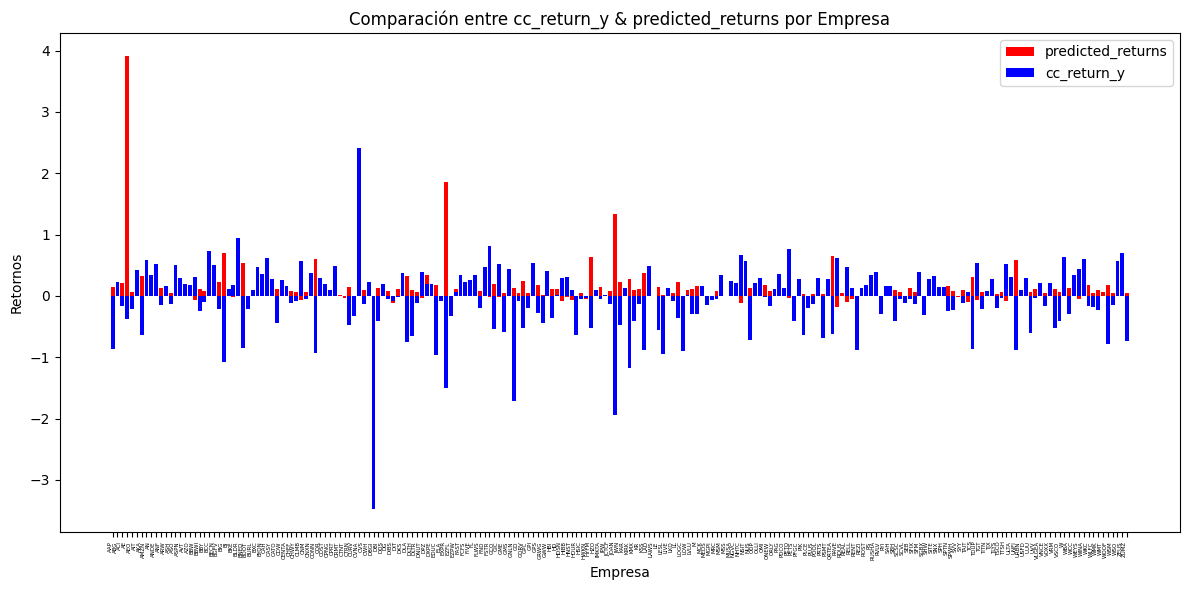

In [818]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que tienes los datos en arrays/lists de 'firmes', 'cc_return_y', y 'predicted_returns'
firmes = datos_fit_1.index.get_level_values('firm')
cc_return_y = datos_fit_1['cc_return_y']
predicted_returns = annual_data['predicted_returns']



# Crear un array para la posición de las empresas en el eje x
index = np.arange(len(firmes))

# Crear el gráfico de barras
plt.figure(figsize=(12,6))

# Graficar predicted_returns con un desplazamiento hacia la derecha
plt.bar(index,predicted_returns, label='predicted_returns', color='r')
# Graficar cc_return_y
plt.bar(index, cc_return_y, label='cc_return_y', color='b')





# Añadimos las etiquetas y el título
plt.xlabel('Empresa')
plt.ylabel('Retornos')
plt.title('Comparación entre cc_return_y & predicted_returns por Empresa')



# Si las etiquetas siguen estando demasiado juntas, se puede reducir el número de etiquetas visibles.
plt.xticks(ticks=index, labels=firmes, rotation=90, ha='right', fontsize=4)


plt.legend()

# Ajustamos el gráfico para evitar que se corten las etiquetas
plt.tight_layout()

# Mostramos el gráfico
plt.show()

En el eje X se muestran las empresas mayoristas y minoristas que presentaron su cierre fiscal correspondiente a los meses del 2023. Como se puede observar, nuestro modelo presenta un alto grado de incertidumbre en la predicción de los retornos futuros anuales. Aunque el modelo tiene una precisión del 4%, lo que ya anticipa errores significativos e incertidumbre en las predicciones, el resultado general indica que el modelo está sufriendo de **underfitting**. Esto significa que no está capturando suficientemente bien los patrones presentes en los datos para predecir los retornos compuestos anuales de manera confiable. En consecuencia, las predicciones a futuro se muestran con una considerable falta de precisión del 96% de error . 


<hr>

# AI Modelo 

In [819]:
DataWinsorizado2

const       ROE       P/E  Net Profit Margin  Gross Margin  \
firm qdate                                                                
AAP  2002Q4    1.0  2.799213  1.331296           0.398745      0.440403   
     2003Q4    1.0  2.283141  2.084618           0.412520      0.459261   
     2004Q4    1.0  2.232545  1.991679           0.427712      0.465049   
     2005Q4    1.0  2.001271  2.554113           0.431588      0.472331   
     2006Q4    1.0  1.968399  1.844451           0.439539      0.476803   
...            ...       ...       ...                ...           ...   
ZUMZ 2019Q1    1.0  0.799246  1.984659           0.327056      0.343276   
     2020Q1    1.0  0.745864  1.285718           0.336164      0.354465   
     2021Q1    1.0  0.595922  3.337609           0.332411      0.353318   
     2022Q1    1.0  0.893002  1.820215           0.353257      0.385795   
     2023Q1    1.0  0.772380  1.142321           0.328275      0.338778   

             BOOKMARKET      EPSP   MARKETVALUE  cc_return_y_f Firm size  \
firm qdate                                                                 
AAP  2002Q4    0.268343  0.751148  1.745366e+06       0.509598    Medium   
     2003Q4    0.210107  0.479704  3.004391e+06       0.070662    Medium   
     2004Q4    0.224895  0.502089  3.211784e+06       0.400416    Medium   
     2005Q4    0.195638  0.391525  4.701385e+06      -0.194005      High   
     2006Q4    0.275435  0.542167  3.742635e+06       0.072406    Medium   
...                 ...       ...           ...            ...       ...   
ZUMZ 2019Q1    0.630425  0.503865  6.352158e+05      -0.362604       Low   
     2020Q1    1.042784  0.777776  4.469630e+05       0.907010       Low   
     2021Q1    0.502777  0.299616  1.099088e+06      -0.115775    Medium   
     2022Q1    0.615212  0.549386  7.612303e+05      -0.728575       Low   
     2023Q1    1.133394  0.875411  3.593879e+05      -0.193885       Low   

             Medium  High  fleverage  fleverage_squared    EPSP_M    EPSP_H  \
firm qdate                                                                    
AAP  2002Q4     1.0   0.0   0.368829           0.136035  0.751148  0.000000   
     2003Q4     1.0   0.0   0.213195           0.045452  0.479704  0.000000   
     2004Q4     1.0   0.0   0.199050           0.039621  0.502089  0.000000   
     2005Q4     0.0   1.0   0.159723           0.025511  0.000000  0.391525   
     2006Q4     1.0   0.0   0.177872           0.031638  0.542167  0.000000   
...             ...   ...        ...                ...       ...       ...   
ZUMZ 2019Q1     0.0   0.0   0.000000           0.000000  0.000000  0.000000   
     2020Q1     0.0   0.0   0.311419           0.096982  0.000000  0.000000   
     2021Q1     1.0   0.0   0.246526           0.060775  0.299616  0.000000   
     2022Q1     0.0   0.0   0.237014           0.056176  0.000000  0.000000   
     2023Q1     0.0   0.0   0.252486           0.063749  0.000000  0.000000   

             BOOKMARKET_M  BOOKMARKET_H  
firm qdate                               
AAP  2002Q4      0.268343      0.000000  
     2003Q4      0.210107      0.000000  
     2004Q4      0.224895      0.000000  
     2005Q4      0.000000      0.195638  
     2006Q4      0.275435      0.000000  
...                   ...           ...  
ZUMZ 2019Q1      0.000000      0.000000  
     2020Q1      0.000000      0.000000  
     2021Q1      0.502777      0.000000  
     2022Q1      0.000000      0.000000  
     2023Q1      0.000000      0.000000  

[2870 rows x 18 columns]

In [820]:
data_regresion['cc_return_y']

firm  qdate 
AAP   2001Q4         NaN
      2002Q4   -0.017233
      2003Q4    0.509598
      2004Q4    0.070662
      2005Q4    0.400416
                  ...   
ZUMZ  2020Q1   -0.362604
      2021Q1    0.907010
      2022Q1   -0.115775
      2023Q1   -0.728575
      2024Q1   -0.193885
Name: cc_return_y, Length: 3129, dtype: float64

In [822]:
con5=['ROE',	'P/E',	'Net Profit Margin',	'Gross Margin',	'BOOKMARKET','EPSP','Medium','High','fleverage','fleverage_squared','EPSP_M','EPSP_H','BOOKMARKET_M','BOOKMARKET_H']
DataWinsorizado2=pd.concat([DataWinsorizado2, data_regresion['cc_return_y']], axis=1)
DataWinsorizado2=DataWinsorizado2.dropna()
X5 = (DataWinsorizado2[con5])
Y5 = DataWinsorizado2['cc_return_y']
DataWinsorizado2

const       ROE       P/E  Net Profit Margin  Gross Margin  \
firm qdate                                                                
AAP  2002Q4    1.0  2.799213  1.331296           0.398745      0.440403   
     2003Q4    1.0  2.283141  2.084618           0.412520      0.459261   
     2004Q4    1.0  2.232545  1.991679           0.427712      0.465049   
     2005Q4    1.0  2.001271  2.554113           0.431588      0.472331   
     2006Q4    1.0  1.968399  1.844451           0.439539      0.476803   
...            ...       ...       ...                ...           ...   
ZUMZ 2019Q1    1.0  0.799246  1.984659           0.327056      0.343276   
     2020Q1    1.0  0.745864  1.285718           0.336164      0.354465   
     2021Q1    1.0  0.595922  3.337609           0.332411      0.353318   
     2022Q1    1.0  0.893002  1.820215           0.353257      0.385795   
     2023Q1    1.0  0.772380  1.142321           0.328275      0.338778   

             BOOKMARKET      EPSP   MARKETVALUE  cc_return_y_f Firm size  \
firm qdate                                                                 
AAP  2002Q4    0.268343  0.751148  1.745366e+06       0.509598    Medium   
     2003Q4    0.210107  0.479704  3.004391e+06       0.070662    Medium   
     2004Q4    0.224895  0.502089  3.211784e+06       0.400416    Medium   
     2005Q4    0.195638  0.391525  4.701385e+06      -0.194005      High   
     2006Q4    0.275435  0.542167  3.742635e+06       0.072406    Medium   
...                 ...       ...           ...            ...       ...   
ZUMZ 2019Q1    0.630425  0.503865  6.352158e+05      -0.362604       Low   
     2020Q1    1.042784  0.777776  4.469630e+05       0.907010       Low   
     2021Q1    0.502777  0.299616  1.099088e+06      -0.115775    Medium   
     2022Q1    0.615212  0.549386  7.612303e+05      -0.728575       Low   
     2023Q1    1.133394  0.875411  3.593879e+05      -0.193885       Low   

             Medium  High  fleverage  fleverage_squared    EPSP_M    EPSP_H  \
firm qdate                                                                    
AAP  2002Q4     1.0   0.0   0.368829           0.136035  0.751148  0.000000   
     2003Q4     1.0   0.0   0.213195           0.045452  0.479704  0.000000   
     2004Q4     1.0   0.0   0.199050           0.039621  0.502089  0.000000   
     2005Q4     0.0   1.0   0.159723           0.025511  0.000000  0.391525   
     2006Q4     1.0   0.0   0.177872           0.031638  0.542167  0.000000   
...             ...   ...        ...                ...       ...       ...   
ZUMZ 2019Q1     0.0   0.0   0.000000           0.000000  0.000000  0.000000   
     2020Q1     0.0   0.0   0.311419           0.096982  0.000000  0.000000   
     2021Q1     1.0   0.0   0.246526           0.060775  0.299616  0.000000   
     2022Q1     0.0   0.0   0.237014           0.056176  0.000000  0.000000   
     2023Q1     0.0   0.0   0.252486           0.063749  0.000000  0.000000   

             BOOKMARKET_M  BOOKMARKET_H  cc_return_y  cc_return_y  
firm qdate                                                         
AAP  2002Q4      0.268343      0.000000    -0.017233    -0.017233  
     2003Q4      0.210107      0.000000     0.509598     0.509598  
     2004Q4      0.224895      0.000000     0.070662     0.070662  
     2005Q4      0.000000      0.195638     0.400416     0.400416  
     2006Q4      0.275435      0.000000    -0.194005    -0.194005  
...                   ...           ...          ...          ...  
ZUMZ 2019Q1      0.000000      0.000000     0.040588     0.040588  
     2020Q1      0.000000      0.000000    -0.362604    -0.362604  
     2021Q1      0.502777      0.000000     0.907010     0.907010  
     2022Q1      0.000000      0.000000    -0.115775    -0.115775  
     2023Q1      0.000000      0.000000    -0.728575    -0.728575  

[2718 rows x 20 columns]

In [830]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supongo que DataWinsorizado2 ya ha sido creado, limpiado, y que 'cc_return_y' ya está concatenado.

# Definimos las columnas independientes (X5) y la dependiente (Y5)
con5 = ['ROE', 'P/E', 'Net Profit Margin', 'Gross Margin', 'BOOKMARKET', 'EPSP', 
        'Medium', 'High', 'fleverage', 'fleverage_squared', 
        'EPSP_M', 'EPSP_H', 'BOOKMARKET_M', 'BOOKMARKET_H']

X5 = DataWinsorizado2[con5]
Y5 = DataWinsorizado2['cc_return_y']

# Dividimos los datos en conjunto de entrenamiento (80%) y prueba (20%)
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X5_train, Y5_train)

# Predicciones con el conjunto de prueba
Y5_pred = model.predict(X5_test)

# Evaluamos el modelo
mse = mean_squared_error(Y5_test, Y5_pred)
r2 = r2_score(Y5_test, Y5_pred)

# Resultados
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 0.20724715212116168
R² Score: 0.2131245935107322


<hr>

## CONCLUSIÓN DE LOS RESULTADOS 


Con el nuevo modelo, hemos observado mejoras en términos de R² (coeficiente de determinación), lo que sugiere un mayor poder explicativo de los coeficientes y una mayor confianza en la capacidad del modelo para predecir los retornos compuestos en los años futuros. Este incremento indica que el modelo es más efectivo en capturar la relación entre las variables predictoras y la variable dependiente. No obstante, aunque hemos mejorado el R² de 3.9% a 4.9%, el avance representa solo un incremento del 1%.

Por otro lado, el modelo de Machine Learning mostró un resultado notablemente superior, con un R² del 21%. Esto implica una mejora del 16% en la precisión, lo cual es sorprendente para un modelo que ajusta automáticamente sus parámetros sin intervención manual. Esta diferencia destaca la capacidad de los algoritmos de aprendizaje automático para encontrar patrones más complejos y optimizar el rendimiento predictivo de manera más eficiente.

## ÁREAS DE OPORTUNIDAD


Investigar y seleccionar ratios financieros que presenten una correlación positiva más fuerte y mayor poder explicativo con los retornos compuestos. Evaluar estos ratios adicionales puede ofrecer una mejor comprensión de los factores que impulsan el comportamiento de los retornos compuestos, mejorando la capacidad predictiva del modelo.
